<a href="https://colab.research.google.com/github/007sanjib/My-test/blob/master/Project_9_NLP_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitter US Airline Sentiment - Problem Statement


## Background and Context:

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.

 

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone
 

## Objective:

To implement the techniques learned as a part of the course.


## Learning Outcomes:

Basic understanding of text pre-processing.
What to do after text pre-processing
Bag of words
Tf-idf
Build the classification model.
Evaluate the Model
 

## Steps and tasks:

1. Import the libraries, load dataset, print the shape of data, data description. (4 Marks)
2. Do Exploratory data analysis(EDA) based on the below statement. (9 Marks)
      a. Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets. 
      b. Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons. 
      c. Plot the word cloud graph of tweets for positive and negative sentiment separately.
3. Understand of data columns: (3 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
4. Text pre-processing: Data preparation. (12 Marks)
NOTE:- Each text pre-processing step should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Removal of stopwords
     f. Conversion to lowercase.
     g. Lemmatize or stemming.
     h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.)
     i. Print the first 5 rows of data after pre-processing.
5. Vectorization: (8 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
6. Fit, tune(optimize the parameter to improve the accuracy)& evaluate the model using both types
    of vectorization. Print the top 40 features and plot their word cloud using both types of vectorization. (14 Marks)
7. Summarize your understanding of the application of Various Pre-processing and Vectorization and
    the performance of your model on this dataset. (6 Marks)
8.Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

 

## Best Practices for the Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

## Submission Guidelines :

The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
Any assignment found copied/plagiarized with other groups will not be graded and will be awarded zero marks.
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
  

Regards

Program Office

Happy Learning!


## Scoring guide (Rubric) - Twitter US Airline Sentiment

### Criteria	Points

Data Summary
Add your view and opinion along with the problem statement, shape of the data, data description.
4

Exploratory data analysis
Plot all (a,b and c) of the graphs that are mentioned in the 2nd section of the problem statement. Mention the observations & insights after plotting each graph.
9

Understanding of Data Columns
Drop unnecessary columns, chek shape of the data, print 1st few rows of data.
3

Data Pre - Processing
Apply all necessary pre-processing steps for this task. Print the first few rows of data after pre-processing.
12

Vectorization
Apply count vectorizer, Tf-IDF vectorizer, on the required text column to make it suitable for fitting the model
8

Modelling , tuning and Evaluation
- Fit the model using vectorized column - Tune the model to improve the accuracy - Evaluate the model using the confusion matrix - Print the top 40 features and plot their word cloud using both types of vectorization. (7+7 Marks)
14

Conclusion
- Summary from the understanding of the application of Various Pre-processing, Vectorization, and performance of the model on the dataset.
6

Overall Structure and flow ofNotebook
Structure and flow Well commented code
4

Points	60


# Project Solution - The Answer by Sanjib: 

Date : Oct-31-2021

Author : Sanjib K Basu

*Note: Google Colab provides Table of Contents on the left top menu*




# 0. Initial Observations regrading the problem

1. Twitter text data are casually written text, sometimes lack grammer, coherency, recognized words. Words are often substiuted with emoji, lingo and symbols. Model of Sentiment Analysis would encouter noise in the data, careful text data pre processing would be important. In certain scenarios, human expert would have difficult choices to classify sentiment of tweets.

2. Twitter has limit of words, and users also spend less time in writting tweets. Moreover, only Feb-2015 data are provided.  The volume of data may be indequate for model inference. A pre-trained model of twitter data with many millions of tweets should have better performance.

3. The sentiment expressed by users could be fake, motivated, or machine generated, too. The reliablity of the source of data impacts trustworthiness of model outcome.

4. In the limited scope of this project, the objective would be to only classify positive, negative, and neutral tweets, based on tweet texts. Further, other features (columns) could have considered in this classification, as well as classification of negative reasons could have been explored.


In [ ]:
!python --version

Python 3.7.12


In [ ]:
!pip install pandas-profiling==2.8.0 --user pandas-profiling



In [ ]:
!pip install emoji
# !pip install emot --upgrade
# !pip install demoji

In [ ]:
!pip install bs4

In [ ]:

!pip install contractions

In [ ]:
!pip install transformers

In [ ]:
# Transformers installation
! pip install transformers datasets

In [ ]:
# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

import os

import pandas as pd
import numpy as np
import pandas_profiling as pf

import copy

from datetime import datetime

import seaborn as sns # for data visualization 
import tensorflow as tf
import keras

from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

from bs4 import BeautifulSoup    
import contractions   

import emoji

import re, string, unicodedata 
import pickle

# import emot
# from emot.emo_unicode import UNICODE_EMO, EMOTICONS

from sklearn.utils import class_weight 

from tensorflow.keras.models import Sequential #sequential api for sequential model 
from tensorflow.keras.layers import Dense, Dropout, Flatten #importing different layers 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam #optimiers for optimizing the model
from keras.callbacks import EarlyStopping  #regularization method to prevent the overfitting
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers
from keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical #to perform one-hot encoding 
from gensim.models import Word2Vec

from tensorflow.keras.preprocessing.text import Tokenizer                        # Text tokenization utility class.
from tensorflow.keras.preprocessing.sequence import pad_sequences                # Pads sequences to the same length.
from tensorflow.keras.models import Sequential                                   # 
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional      #Keras layers API.

import tensorflow_datasets as tfds


# Model hyper parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    make_scorer
)

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import nltk
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

import pickle
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('display.max_colwidth', None) # prints the DataFrame cells with full text, none of its values truncated.
pd.set_option('display.max_columns', 100) # prints upto 100 columns
pd.set_option('display.max_rows', 200) # prints upto 200 rows
pd.set_option('display.colheader_justify', 'left') # dataframe column header left justified

pd.options.display.float_format = (
    "{:,.4f}".format
)  # format upto 4 decimals of float numbers

sns.set(color_codes=True)  # keeps the colored grid in the plot background
sns.set_context("talk")  # talk : bolds the plots
plt.style.use("seaborn-notebook")  # set a default style while plotting

In [ ]:
print(tf.__version__)

2.7.0


# 1. Overview of the Dataset

 Load the data and perform preliminary analysis

In [ ]:
# mount the G drive
from google.colab import drive
drive.mount('/content/drive' ,force_remount=False) #force_remount=True

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks


'Copy of Project_9_NLP_Twitter_Sentiment_Analysis.ipynb'   tweet-clean_bak1.csv
 images.npy						   tweet-clean.csv
 Labels.csv						   Tweets.csv
 Project_8_Plant_Seedling_Classification.ipynb		   UT-Austin
 Project_9_NLP_Twitter_Sentiment_Analysis.ipynb


In [ ]:
df_tweets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Tweets.csv")

df_tweets

tweet_id           airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513   neutral         1.0000                          
1      570301130888122368  positive         0.3486                          
2      570301083672813571   neutral         0.6837                          
3      570301031407624196  negative         1.0000                          
4      570300817074462722  negative         1.0000                          
...                   ...               ...                           ...   
14635  569587686496825344  positive         0.3487                          
14636  569587371693355008  negative         1.0000                          
14637  569587242672398336   neutral         1.0000                          
14638  569587188687634433  negative         1.0000                          
14639  569587140490866689   neutral         0.6771                          

      negativereason           negativereason_confidence airline          \
0                         NaN    nan                      Virgin America   
1                         NaN 0.0000                      Virgin America   
2                         NaN    nan                      Virgin America   
3                  Bad Flight 0.7033                      Virgin America   
4                  Can't Tell 1.0000                      Virgin America   
...                       ...                        ...             ...   
14635                     NaN 0.0000                            American   
14636  Customer Service Issue 1.0000                            American   
14637                     NaN    nan                            American   
14638  Customer Service Issue 0.6659                            American   
14639                     NaN 0.0000                            American   

      airline_sentiment_gold name             negativereason_gold  \
0      NaN                            cairdin  NaN                  
1      NaN                           jnardino  NaN                  
2      NaN                         yvonnalynn  NaN                  
3      NaN                           jnardino  NaN                  
4      NaN                           jnardino  NaN                  
...                      ...              ...                 ...   
14635  NaN                    KristenReenders  NaN                  
14636  NaN                           itsropes  NaN                  
14637  NaN                           sanyabun  NaN                  
14638  NaN                         SraJackson  NaN                  
14639  NaN                          daviddtwu  NaN                  

       retweet_count  \
0      0               
1      0               
2      0               
3      0               
4      0               
...              ...   
14635  0               
14636  0               
14637  0               
14638  0               
14639  0               

      text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                  

In [ ]:
df_tweets.shape

(14640, 15)

In [ ]:
df_tweets.info() # checking null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
df_tweets.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
df_tweets.describe(include="all").T


count       unique top                          \
tweet_id                     14,640.0000    NaN                         NaN   
airline_sentiment                  14640      3                    negative   
airline_sentiment_confidence 14,640.0000    NaN                         NaN   
negativereason                      9178     10      Customer Service Issue   
negativereason_confidence    10,522.0000    NaN                         NaN   
airline                            14640      6                      United   
airline_sentiment_gold                40      3                    negative   
name                               14640   7701                 JetBlueNews   
negativereason_gold                   32     13      Customer Service Issue   
retweet_count                14,640.0000    NaN                         NaN   
text                               14640  14427              @united thanks   
tweet_coord                         1019    832                  [0.0, 0.0]   
tweet_created                      14640  14247   2015-02-24 09:54:34 -0800   
tweet_location                      9907   3081                  Boston, MA   
user_timezone                       9820     85  Eastern Time (US & Canada)   

                             freq  mean                          \
tweet_id                       NaN 569,218,351,767,382,528.0000   
airline_sentiment             9178                          NaN   
airline_sentiment_confidence   NaN                       0.9002   
negativereason                2910                          NaN   
negativereason_confidence      NaN                       0.6383   
airline                       3822                          NaN   
airline_sentiment_gold          32                          NaN   
name                            63                          NaN   
negativereason_gold             12                          NaN   
retweet_count                  NaN                       0.0827   
text                             6                          NaN   
tweet_coord                    164                          NaN   
tweet_created                    5                          NaN   
tweet_location                 157                          NaN   
user_timezone                 3744                          NaN   

                             std                       \
tweet_id                     779,111,158,481,836.7500   
airline_sentiment                                 NaN   
airline_sentiment_confidence                   0.1628   
negativereason                                    NaN   
negativereason_confidence                      0.3304   
airline                                           NaN   
airline_sentiment_gold                            NaN   
name                                              NaN   
negativereason_gold                               NaN   
retweet_count                                  0.7458   
text                                              NaN   
tweet_coord                                       NaN   
tweet_created                                     NaN   
tweet_location                                    NaN   
user_timezone                                     NaN   

                             min                           \
tweet_id                     567,588,278,875,213,824.0000   
airline_sentiment                                     NaN   
airline_sentiment_confidence                       0.3350   
negativereason                                        NaN   
negativereason_confidence                          0.0000   
airline                                               NaN   
airline_sentiment_gold                                NaN   
name                                                  NaN   
negativereason_gold                                   NaN   
retweet_count                                      0.0000   
text                                                  NaN   
tweet_coord                                   

### Observation by Sanjib:

1. The data is spread over 85 time zones and 3081 locations. Next, we can check the distribution of tweet_created. Thereafter, the sample dataset may be assumed to be good representation of the population of data.

2. 

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


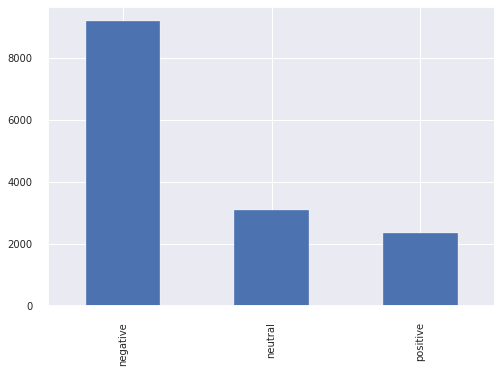

In [ ]:
print(df_tweets["airline_sentiment"].value_counts())

df_tweets["airline_sentiment"].value_counts().plot(kind="bar")

### Observation by Sanjib:

1. The "airline_sentiment" is likely to be the target variable, we'll confirm with futher EDA. The variable "airline_sentiment" does not have any missing value.

In [ ]:
df_tweets["airline_sentiment"].value_counts(normalize=True)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64

# 2. Exploratory Data Analysis:

In [ ]:
%%time
df_tweets.profile_report(title="Pandas Profiling of Tweet Data")


CPU times: user 31.7 ms, sys: 848 µs, total: 32.5 ms
Wall time: 32 ms


Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
print("Mininum tweet_created =",min(pd.to_datetime(df_tweets["tweet_created"])),
      "Maximum tweet_created =", max(pd.to_datetime(df_tweets["tweet_created"])))

Mininum tweet_created = 2015-02-16 23:36:05-08:00 Maximum tweet_created = 2015-02-24 11:53:37-08:00


In [ ]:
%%time

column_categories = ["airline", 
                     "retweet_count",
                     "user_timezone", 
                     "name",
                     "negativereason",
                     "tweet_location", 
                      ]

for col in column_categories:
    print("="*40, col)
    print(df_tweets[col].value_counts() )



======================================== airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64
======================================== retweet_count
0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64
======================================== user_timezone
Eastern Time (US & Canada)     3744
Central Time (US & Canada)     1931
Pacific Time (US & Canada)     1208
Quito                           738
Atlantic Time (Canada)          497
Mountain Time (US & Canada)     369
Arizona                         229
London                          195
Alaska                          108
Sydney                          107
Hawaii                          104
Amsterdam                    

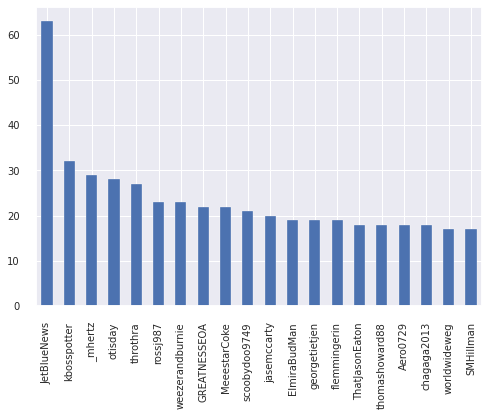

In [ ]:
# top 20 users by number of tweets
df_tweets["name"].value_counts().head(20).plot(kind="bar");

### Observation by Sanjib:
1. The JetBlueNews mention (name) looks like sponsored by company, and would never tweet negative sentiment.


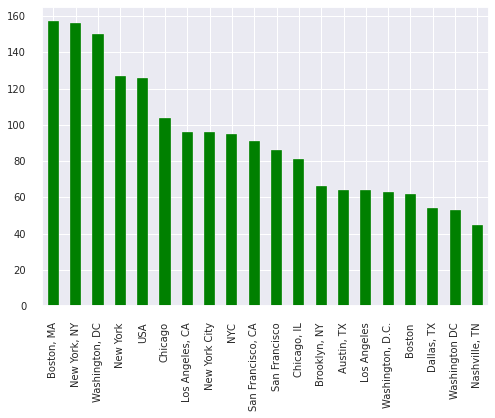

In [ ]:
# top 20 locations by number of tweets
df_tweets["tweet_location"].value_counts().head(20).plot(kind="bar",
                                                         color="Green");

In [ ]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline",
    index="negativereason",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline                      American  Delta  Southwest  US Airways  United  \
negativereason                                                                
Bad Flight                    87        64     90        104         216      
Can't Tell                   198       186    159        246         379      
Cancelled Flight             246        51    162        189         181      
Customer Service Issue       768       199    391        811         681      
Damaged Luggage               12        11     14         11          22      
Flight Attendant Complaints   87        60     38        123         168      
Flight Booking Problems      130        44     61        122         144      
Late Flight                  249       269    152        453         525      
Lost Luggage                 149        57     90        154         269      
longlines                     34        14     29         50          48      

airline                      Virgin America  
negativereason                               
Bad Flight                   19              
Can't Tell                   22              
Cancelled Flight             18              
Customer Service Issue       60              
Damaged Luggage               4              
Flight Attendant Complaints   5              
Flight Booking Problems      28              
Late Flight                  17              
Lost Luggage                  5              
longlines                     3

In [ ]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="retweet_count",
    index="negativereason",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

retweet_count                0          1        2       3      4      5      \
negativereason                                                                 
Bad Flight                    541.0000  35.0000  2.0000 2.0000    nan    nan   
Can't Tell                  1,099.0000  74.0000  4.0000 5.0000 3.0000    nan   
Cancelled Flight              803.0000  33.0000  7.0000 1.0000 2.0000 1.0000   
Customer Service Issue      2,721.0000 166.0000 17.0000 3.0000 3.0000    nan   
Damaged Luggage                72.0000   1.0000     nan    nan 1.0000    nan   
Flight Attendant Complaints   442.0000  35.0000  3.0000 1.0000    nan    nan   
Flight Booking Problems       503.0000  20.0000  3.0000    nan 1.0000 1.0000   
Late Flight                 1,558.0000 102.0000  3.0000    nan 1.0000    nan   
Lost Luggage                  673.0000  49.0000  2.0000    nan    nan    nan   
longlines                     169.0000   9.0000     nan    nan    nan    nan   

retweet_count                7      18     22     31     32     44     
negativereason                                                         
Bad Flight                     nan    nan    nan    nan    nan    nan  
Can't Tell                  1.0000 1.0000 1.0000 1.0000 1.0000    nan  
Cancelled Flight               nan    nan    nan    nan    nan    nan  
Customer Service Issue         nan    nan    nan    nan    nan    nan  
Damaged Luggage                nan    nan    nan    nan    nan    nan  
Flight Attendant Complaints    nan    nan    nan    nan    nan    nan  
Flight Booking Problems     1.0000    nan    nan    nan    nan    nan  
Late Flight                    nan    nan    nan    nan    nan 1.0000  
Lost Luggage                   nan    nan    nan    nan    nan    nan  
longlines                      nan    nan    nan    nan    nan    nan

In [ ]:
# df_pivot*100.0/df_tweets.shape[0]



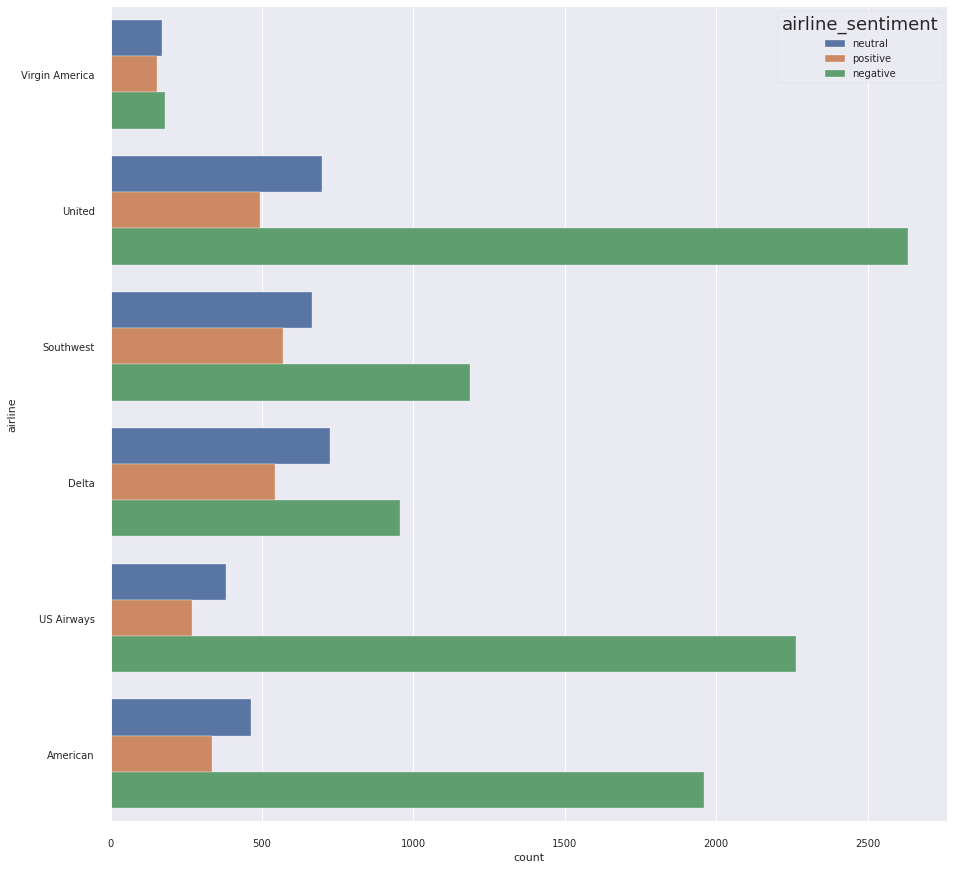

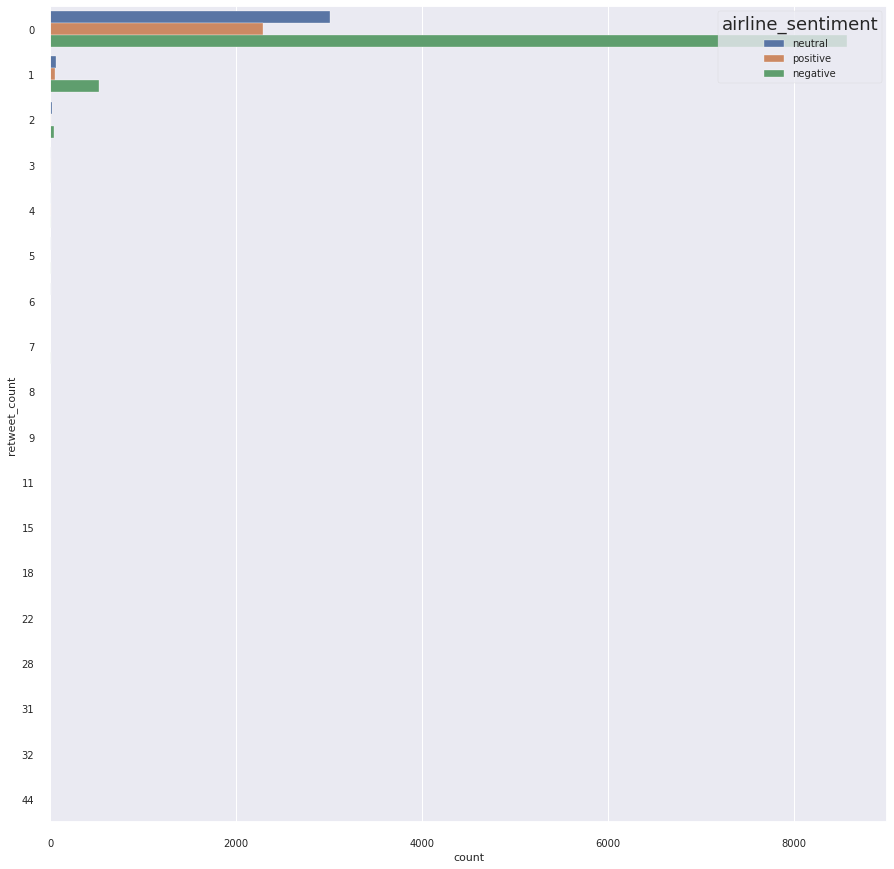

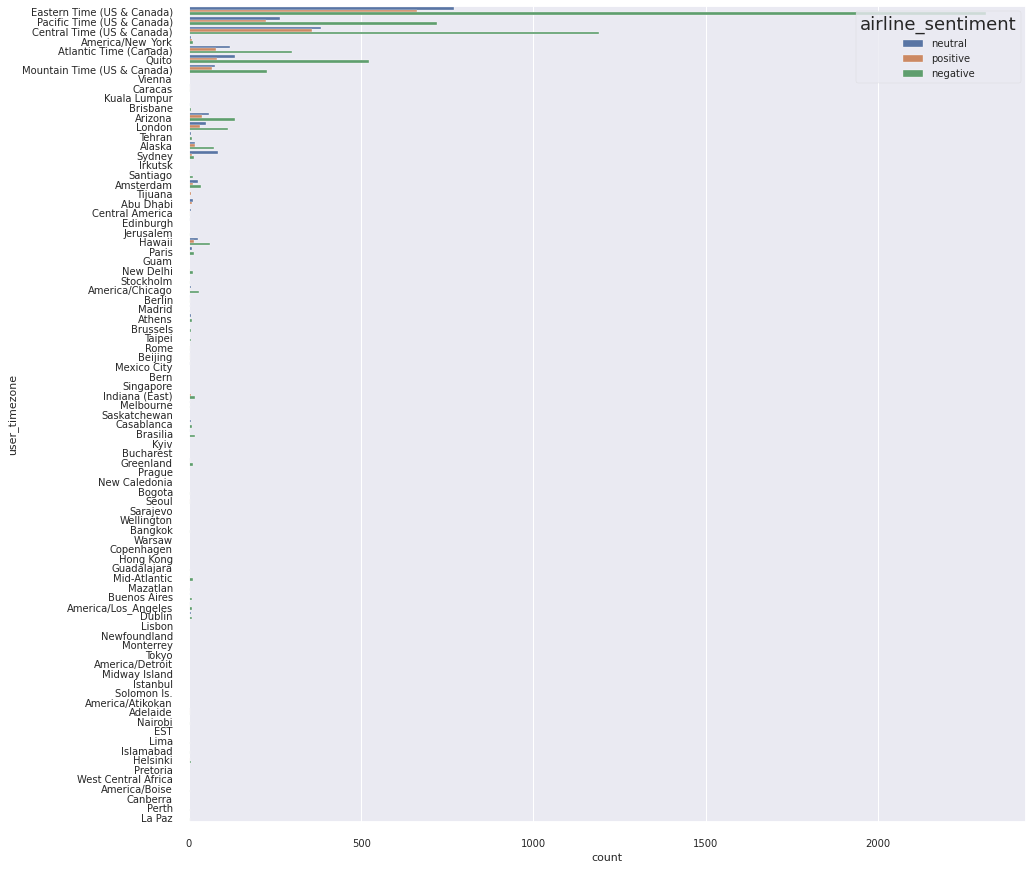

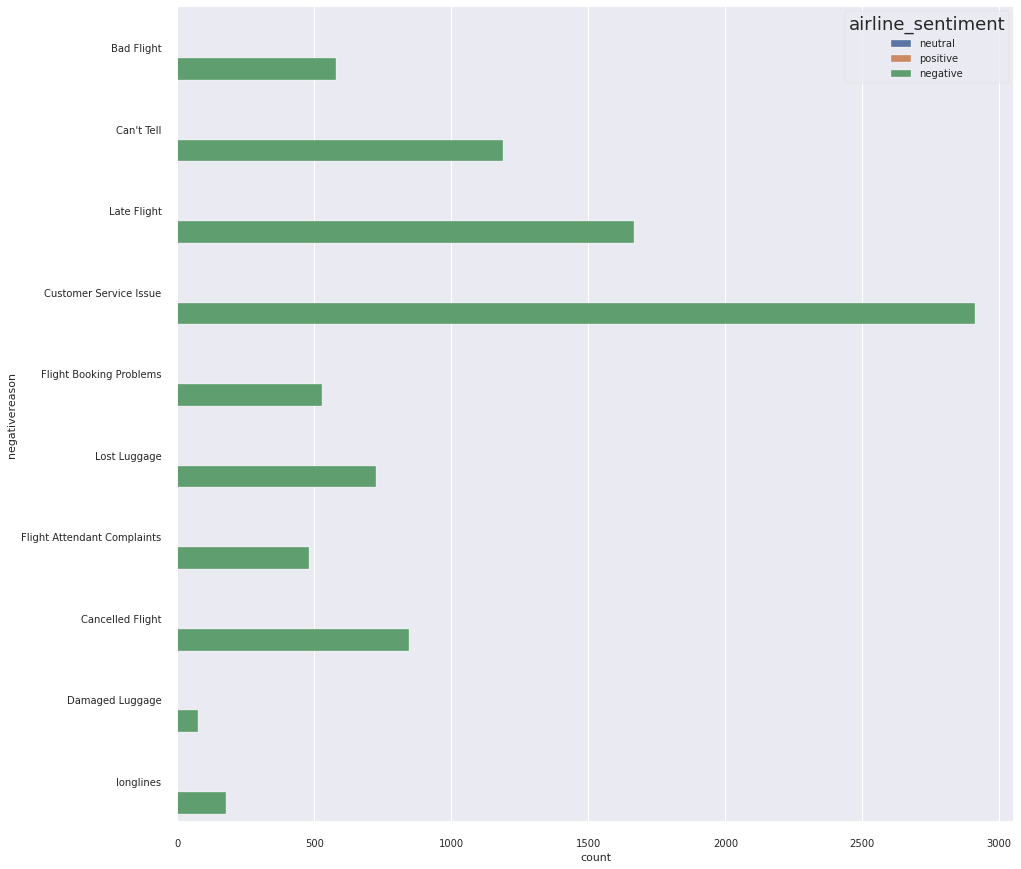

CPU times: user 2.88 s, sys: 108 ms, total: 2.99 s
Wall time: 2.94 s


In [ ]:
%%time

column_categories = ["airline", 
                     "retweet_count",
                     "user_timezone", 
                     "negativereason"
                    #  "name",
                    #  "tweet_location", 
                      ]

for col in column_categories:
  plt.figure(figsize=(15,15))
  sns.countplot(data=df_tweets,
              # y="tweet_id",
              y=col,
              hue="airline_sentiment"
              )
  plt.show()

In [ ]:
df_pivot = pd.pivot_table(
    data=df_tweets ,
    columns="airline_sentiment",
    index="retweet_count",
    values="tweet_id",
    aggfunc=np.count_nonzero,
)
df_pivot

airline_sentiment  negative   neutral    positive 
retweet_count                                     
0                 8,581.0000 3,005.0000 2,287.0000
1                   524.0000    63.0000    53.0000
2                    41.0000    16.0000     9.0000
3                    12.0000     7.0000     3.0000
4                    11.0000     2.0000     4.0000
5                     2.0000     2.0000     1.0000
6                        nan     2.0000     1.0000
7                     2.0000        nan     1.0000
8                        nan        nan     1.0000
9                        nan        nan     1.0000
11                       nan        nan     1.0000
15                       nan     1.0000        nan
18                    1.0000        nan        nan
22                    1.0000        nan     1.0000
28                       nan     1.0000        nan
31                    1.0000        nan        nan
32                    1.0000        nan        nan
44                    1.0000        nan        nan

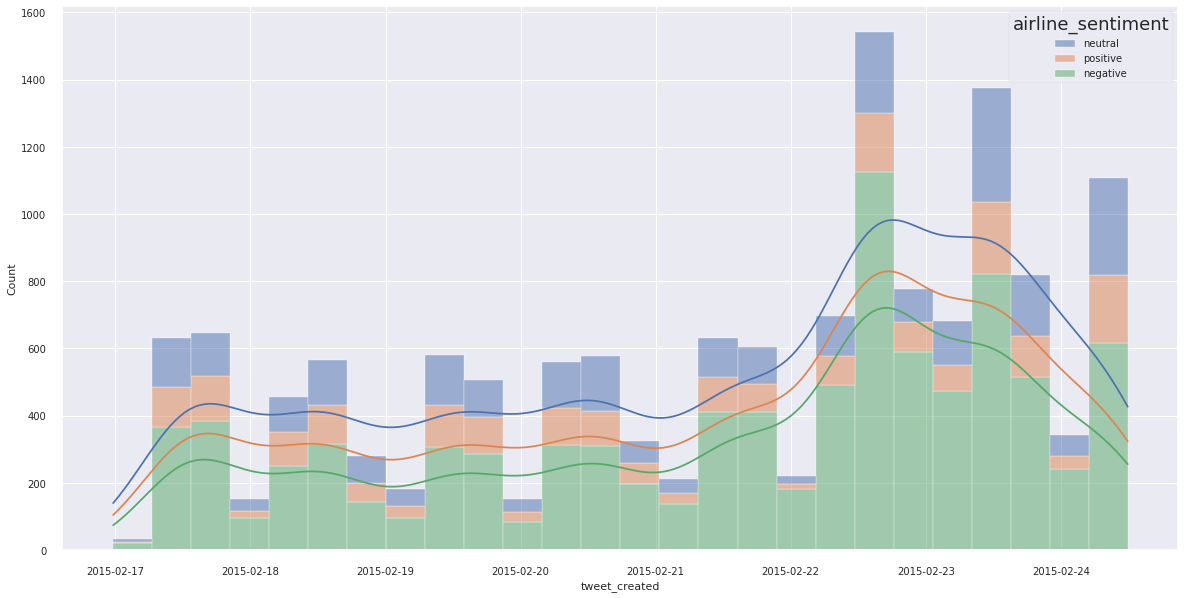

In [ ]:
plt.figure(figsize=(20,10))

sns.histplot(data=df_tweets,
            bins="auto",
            x=pd.to_datetime(df_tweets["tweet_created"]),
            hue="airline_sentiment",
            multiple="stack",
            kde=True
            )

plt.show()

In [ ]:
datetime(2015,2,23).strftime("%A")
# pd.Timestamp("2015-02-23").weekday_name

'Monday'

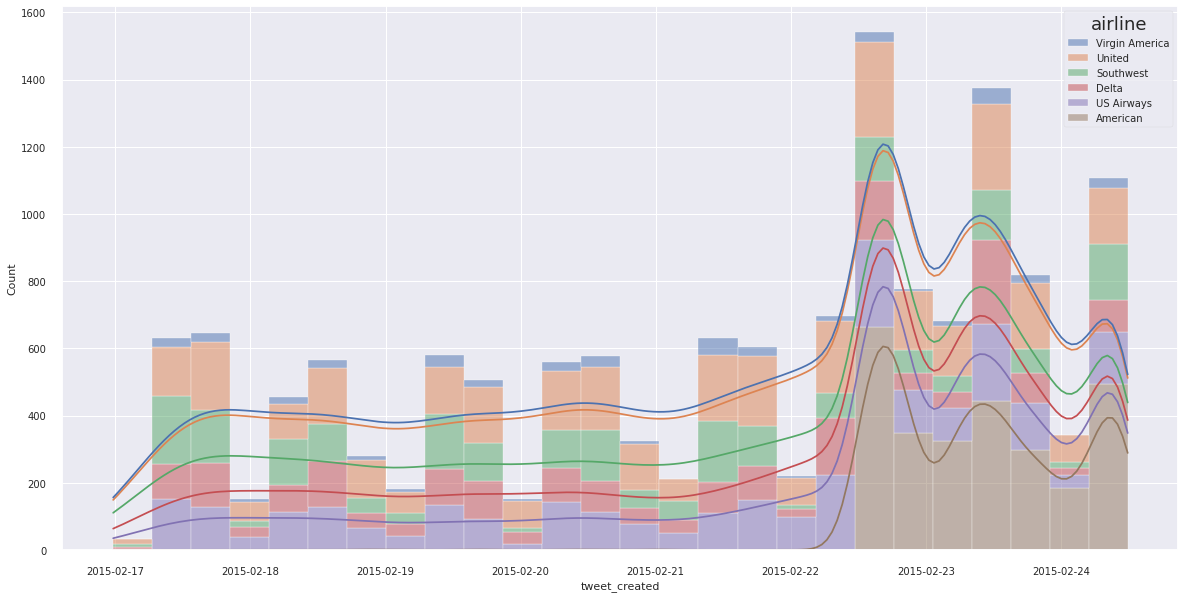

In [ ]:
plt.figure(figsize=(20,10))

sns.histplot(data=df_tweets,
            bins="auto",
            x=pd.to_datetime(df_tweets["tweet_created"]),
            hue="airline",
            multiple="stack",
            kde=True
            )

plt.show()

In [ ]:
df_tweets["text"].sample(10)

12344    @AmericanAir Customer service provides no wiggle room to change flight without a $200 change fee. @southwest has always been accommodating.
2301                                                                                                   @united can I get your service desk # at IAD?
6723                                                                                                          @SouthwestAir Beautiful, thanks a ton!
13271    @AmericanAir Lost black wallet at #DallasAirport.I was on flight 2208 to CLE.Would appreciate ur help. Last I used it at @Starbucks on A20.
13890                                                                                        @AmericanAir what is the status of flight 1675 tomorrow
11246                                  @USAirways new problem...had wrong last name on reservation which is airways fixed. New can't get through TSA
11156                                                                                                     

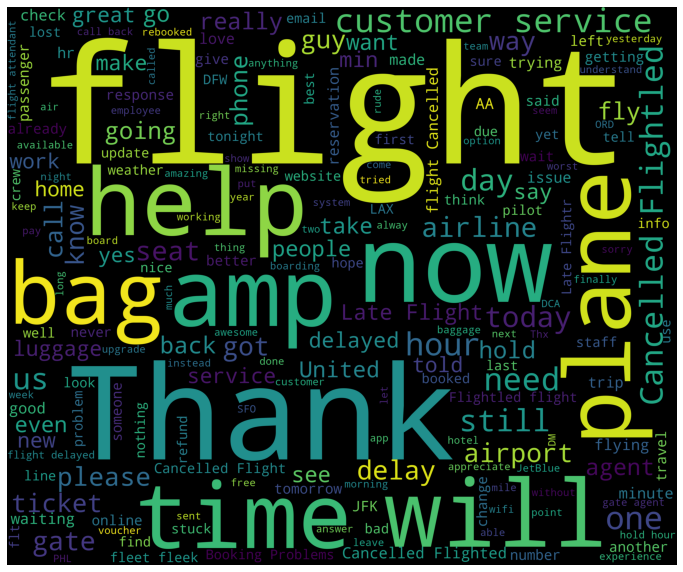

CPU times: user 24 s, sys: 420 ms, total: 24.5 s
Wall time: 24.4 s


In [ ]:
%%time

words = ' '.join(df_tweets['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()                     

In [ ]:
df_tweets.loc[df_tweets['airline_sentiment']=='negative']

tweet_id           airline_sentiment  airline_sentiment_confidence  \
3      570301031407624196  negative         1.0000                          
4      570300817074462722  negative         1.0000                          
5      570300767074181121  negative         1.0000                          
15     570282469121007616  negative         0.6842                          
17     570276917301137409  negative         1.0000                          
...                   ...               ...                           ...   
14631  569588464896876545  negative         1.0000                          
14633  569587705937600512  negative         1.0000                          
14634  569587691626622976  negative         0.6684                          
14636  569587371693355008  negative         1.0000                          
14638  569587188687634433  negative         1.0000                          

      negativereason           negativereason_confidence airline          \
3                  Bad Flight 0.7033                      Virgin America   
4                  Can't Tell 1.0000                      Virgin America   
5                  Can't Tell 0.6842                      Virgin America   
15                Late Flight 0.3684                      Virgin America   
17                 Bad Flight 1.0000                      Virgin America   
...                       ...                        ...             ...   
14631              Bad Flight 1.0000                            American   
14633        Cancelled Flight 1.0000                            American   
14634             Late Flight 0.6684                            American   
14636  Customer Service Issue 1.0000                            American   
14638  Customer Service Issue 0.6659                            American   

      airline_sentiment_gold name             negativereason_gold  \
3      NaN                           jnardino  NaN                  
4      NaN                           jnardino  NaN                  
5      NaN                           jnardino  NaN                  
15     NaN                    smartwatermelon  NaN                  
17     NaN                      heatherovieda  NaN                  
...                      ...              ...                 ...   
14631  NaN                           MDDavis7  NaN                  
14633  NaN                    RussellsWriting  NaN                  
14634  NaN                      GolfWithWoody  NaN                  
14636  NaN                           itsropes  NaN                  
14638  NaN                         SraJackson  NaN                  

       retweet_count  \
3      0               
4      0               
5      0               
15     0               
17     0               
...              ...   
14631  0               
14633  0               
14634  0               
14636  0               
14638  0               

      text                                                                                                                                                     \
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
5                    @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA   
15                                                                                                              @VirginAmerica SFO-PDX schedule is still MIA.   
17                  @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two large gentleman on either side of me. HELP!   
...                                                                                  

********************************************************************************
****************************** negative


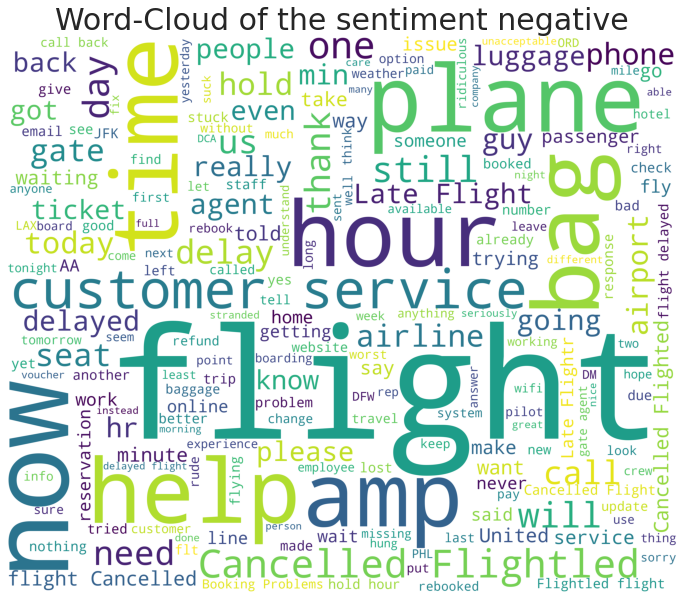

********************************************************************************
****************************** neutral


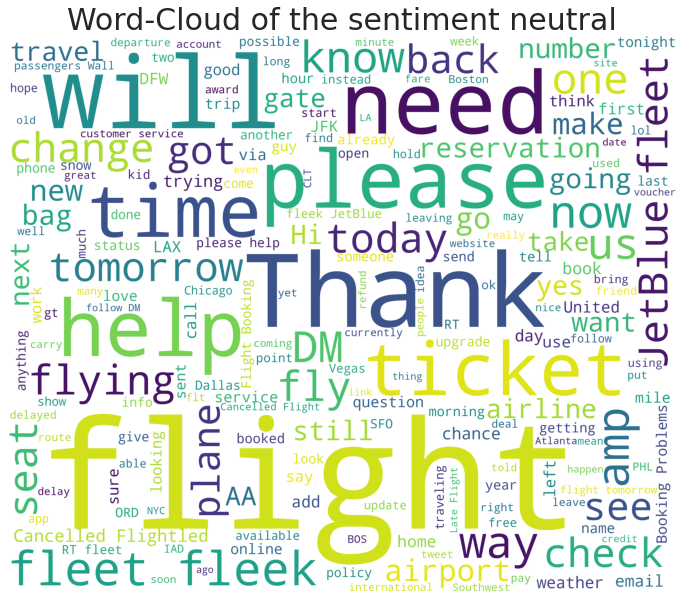

********************************************************************************
****************************** positive


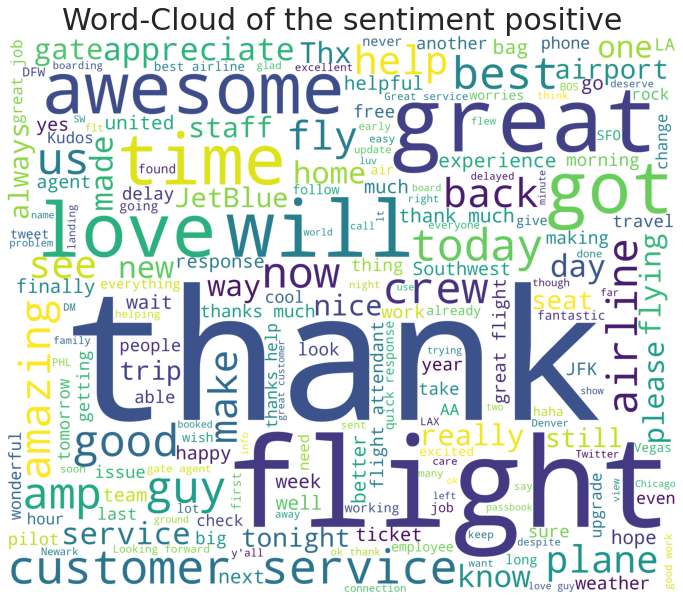

CPU times: user 1min 8s, sys: 1.11 s, total: 1min 9s
Wall time: 1min 9s


In [ ]:
%%time
for col_value in list(df_tweets["airline_sentiment"].value_counts().index):
  print("*"*80)
  print("*"*30, col_value)
  words = ' '.join(
      df_tweets.loc[df_tweets['airline_sentiment']==col_value]['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and not word.startswith('#')
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='white',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)

  plt.figure(1,figsize=(12, 12))
  plt.imshow(wordcloud)
  plt.title("Word-Cloud of the sentiment " + col_value,
            fontsize=30)
  plt.axis('off')
  plt.show()   

============================== United


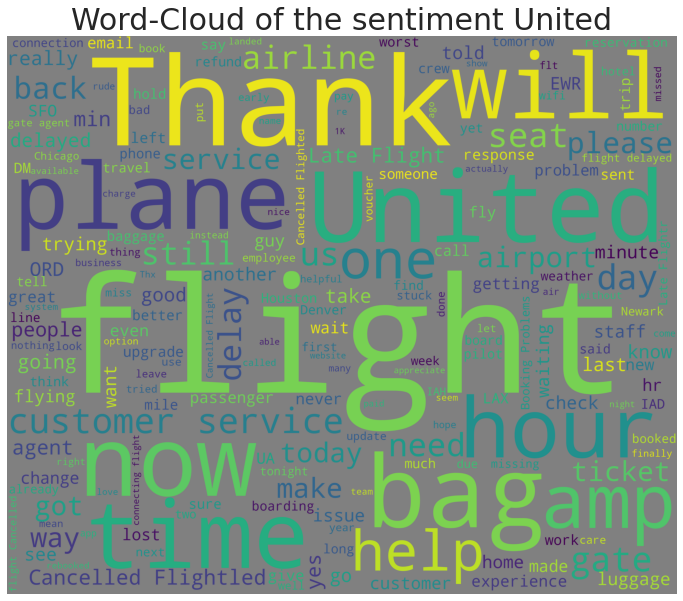

============================== US Airways


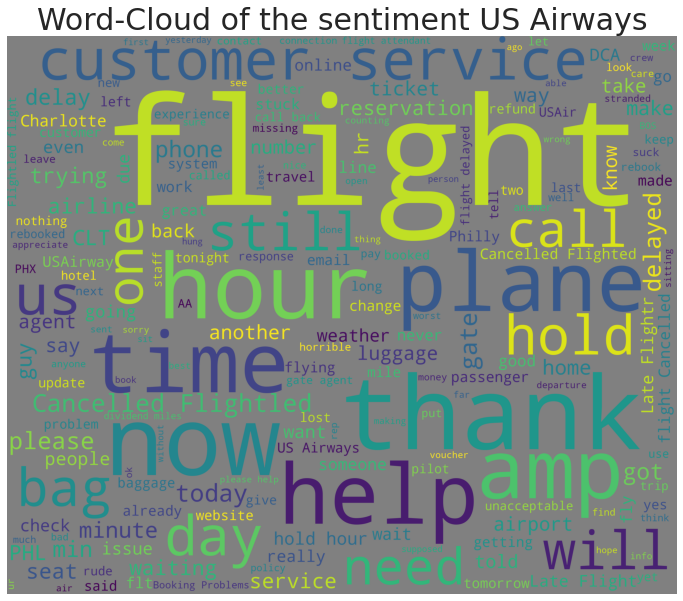

============================== American


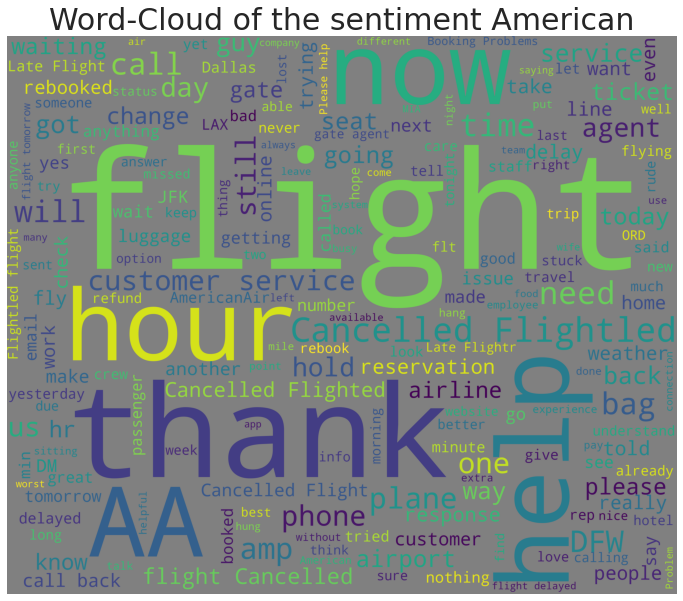

============================== Southwest


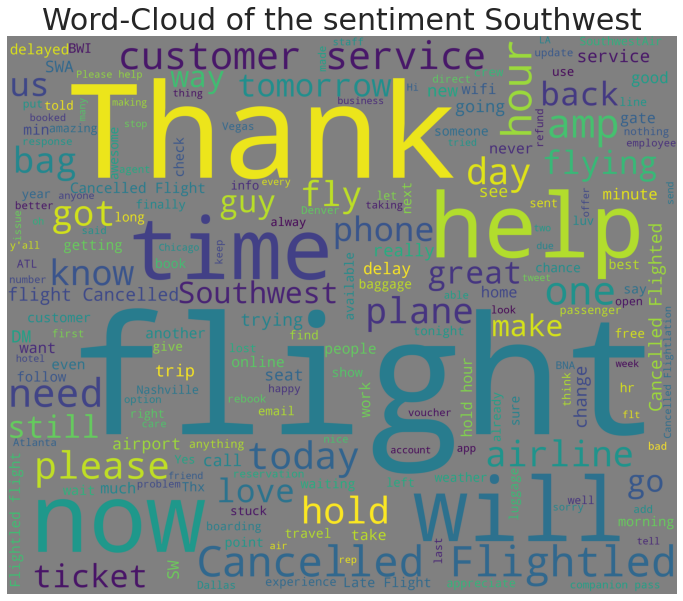

============================== Delta


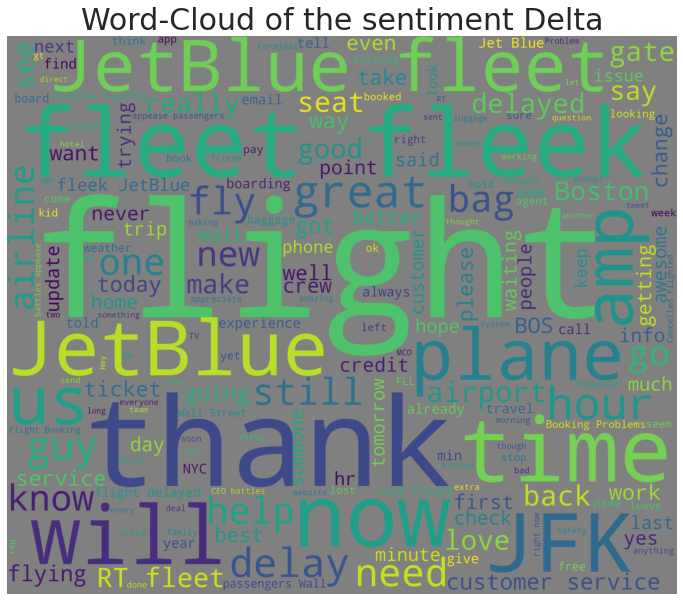

============================== Virgin America


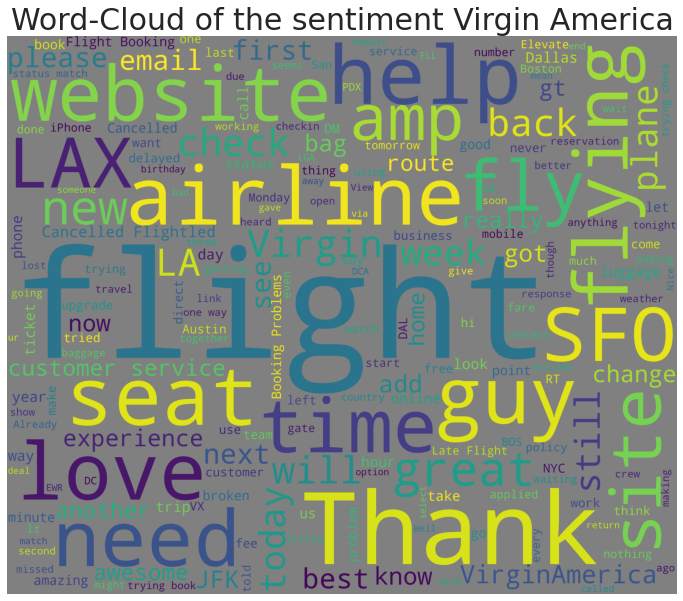

CPU times: user 2min 21s, sys: 2.3 s, total: 2min 23s
Wall time: 2min 22s


In [ ]:
%%time
for col_value in list(df_tweets["airline"].value_counts().index):
  print("="*80)
  print("="*30, col_value)
  words = ' '.join(
      df_tweets.loc[df_tweets['airline']==col_value]['text'])
  cleaned_word = " ".join([word for word in words.split()
                              if 'http' not in word
                                  and not word.startswith('@')
                                  and not word.startswith('#')
                              ])
  wordcloud = WordCloud(stopwords=STOPWORDS,
                        background_color='grey',
                        width=3000,
                        height=2500
                      ).generate(cleaned_word)

  plt.figure(1,figsize=(12, 12))
  plt.title("Word-Cloud of the sentiment " + col_value,
            fontsize=30)
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show() 

In [ ]:
Categories_hour = df_tweets["tweet_created"].apply(lambda x : pd.Timestamp(x).hour)
Categories_hour

0        11
1        11
2        11
3        11
4        11
         ..
14635    12
14636    11
14637    11
14638    11
14639    11
Name: tweet_created, Length: 14640, dtype: int64

In [ ]:
Categories_hour = Categories_hour.value_counts().sort_index(ascending=False)
Categories_hour

23     193
22     292
21     430
20     602
19     675
18     751
17     754
16     734
15     788
14     927
13     900
12     824
11     986
10     962
9     1013
8      926
7      776
6      621
5      477
4      368
3      225
2      174
1      111
0      131
Name: tweet_created, dtype: int64

Text(0.5, 1.0, 'Proportion of tweets for each hour of the day')

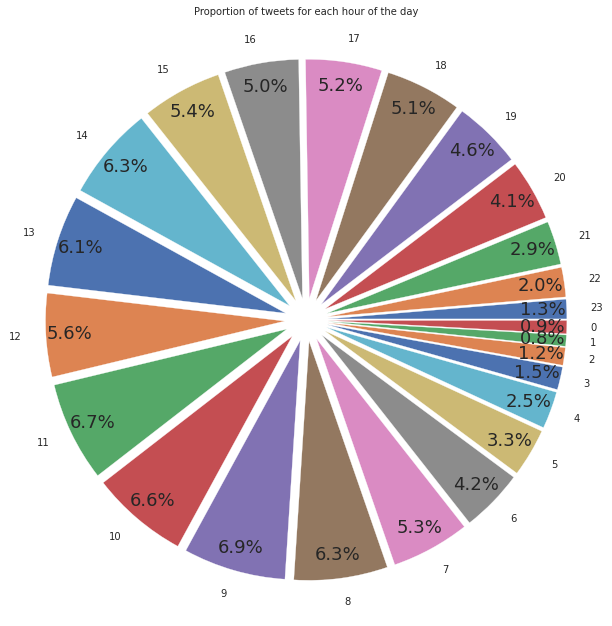

In [ ]:
pie, ax = plt.subplots(figsize=[20,11])
# labels = Category.keys()
plt.pie(x=Categories_hour, 
        autopct="%.1f%%", 
        explode=[0.09]*24, 
        labels=Categories_hour.keys(), 
        pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=10)

In [ ]:
df_tweets["word_count"] = [len(t.split()) for t in df_tweets["text"]]
df_tweets["word_count"].describe().T

count   14,640.0000
mean        17.6534
std          6.8823
min          2.0000
25%         12.0000
50%         19.0000
75%         23.0000
max         36.0000
Name: word_count, dtype: float64

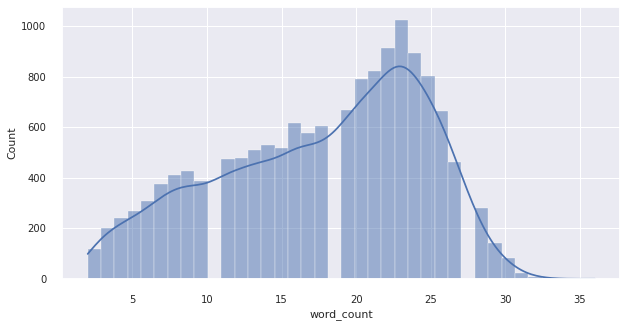

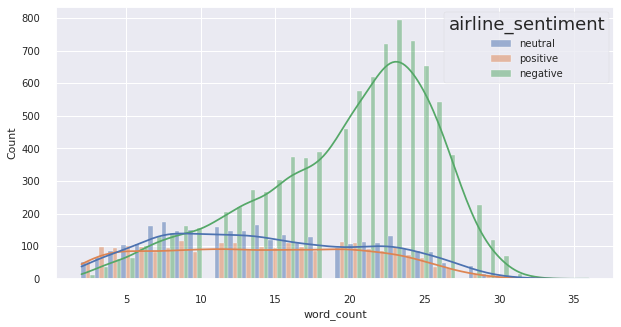

<Figure size 720x360 with 0 Axes>

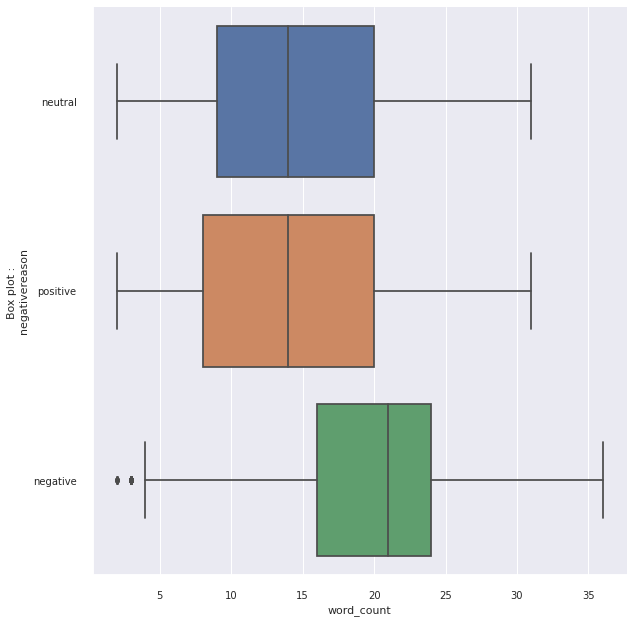

In [ ]:
# distribution of data on word_count


plt.figure(figsize=(10,5))
sns.histplot(data=df_tweets,
            #  hue="airline_sentiment",
             x="word_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(data=df_tweets,
             hue="airline_sentiment",
             x="word_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(10,5))
sns.catplot(data=df_tweets, 
            y="airline_sentiment", 
            x="word_count", 
            height=9, 
            kind="box")
plt.ylabel("Box plot : \n" + col)
plt.show()

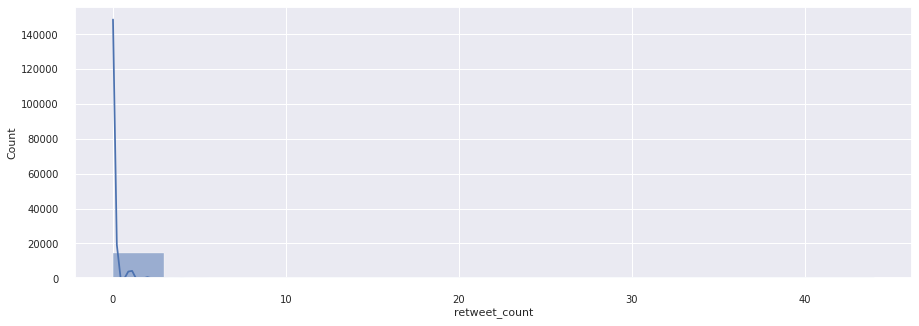

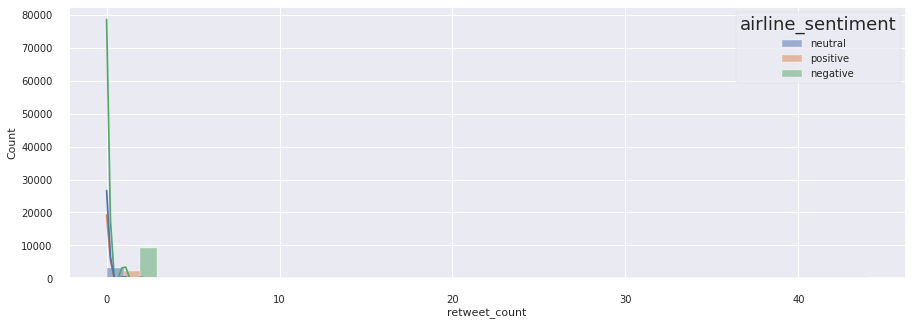

<Figure size 1080x360 with 0 Axes>

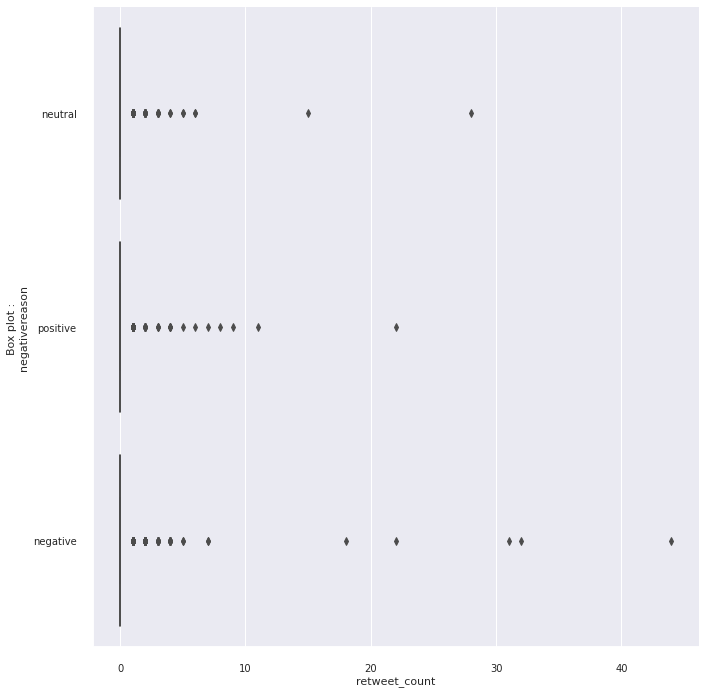

In [ ]:
# distribution of data on retweet_count

plt.figure(figsize=(15,5))
sns.histplot(data=df_tweets,
            #  hue="airline_sentiment",
             x="retweet_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(15,5))
sns.histplot(data=df_tweets,
             hue="airline_sentiment",
             x="retweet_count",
             kde=True,
             multiple="dodge")
plt.show()

plt.figure(figsize=(15,5))
sns.catplot(data=df_tweets, 
            y="airline_sentiment", 
            x="retweet_count", 
            height=10, 
            kind="box")
plt.ylabel("Box plot : \n" + col)
plt.show()

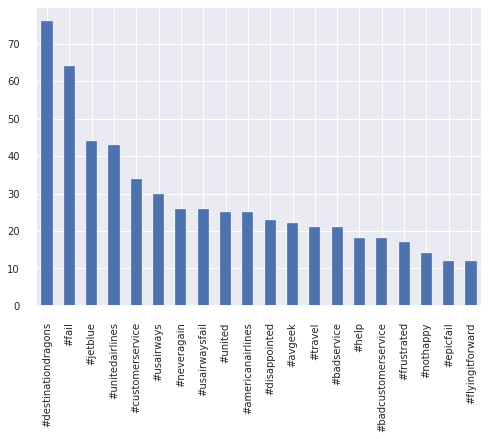

In [ ]:
# top 20 occuring hashtags 
words = ' '.join(df_tweets['text'])

list_hashtags = [ x.lower() for x in words.split() if x.startswith("#")\
                    and x not in ["#"]]
pd.Series(list_hashtags, 
          index=None).value_counts(sort=True).head(20).plot(kind="bar")

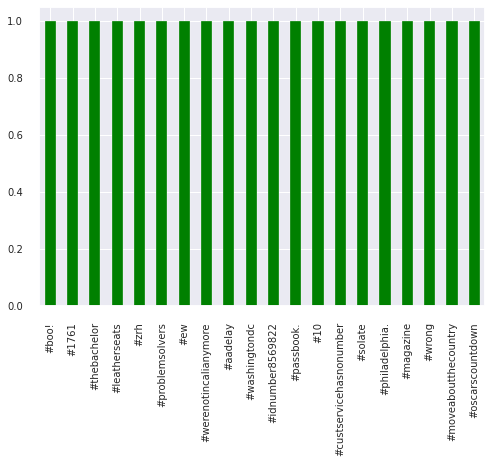

In [ ]:
# rare 20 hashtags
pd.Series(list_hashtags, 
          index=None).value_counts(sort=True).tail(20).plot(kind="bar",
                                                            color="Green")

In [ ]:
# all hashtags, including repeatitions
str_hashtags = " ".join(list_hashtags)
str_hashtags

'#fabulous #seductive #stress #29daystogo #fail #vx358 #noair #worstflightever #roasted #sfotobos #sendambien #andchexmix #moodlitmonday #sciencebehindtheexperience #moodlitmonday #travelhelp #elevategold #tribute #soundofmusic #oscars2015 #guiltypleasures #carrieunderwood #cmfat35000feet #neverflyvirginforbusiness #inflight #flightattendant #dreampath #neverflyvirgin #change #nomorevirgin #uncomfortable #sfo2lax #sneaky #customerservice #virginamerica #flying #sarcasm #cheapflights #farecompare #cheapflights #farecompare #cheapflights #farecompare #cheapflights #farecompare #phl #pleasecomeback #vabeatsjblue #oscars2015 #likingyoulessandless #oscars #redcarpet #oscars #oscars2015 #frustrated #lame #irmafromdallas #princesshalf #flight #dc #sunset #globe #backtowinter #work! #refreshed #redwineisbetter #emirates #baggageissues #smh #southwestair #flights #disappointed #elevate #gold #worst #flight #americanairlines #disappointed. #expected #beatstheothers #seriously #soreback #diehardv

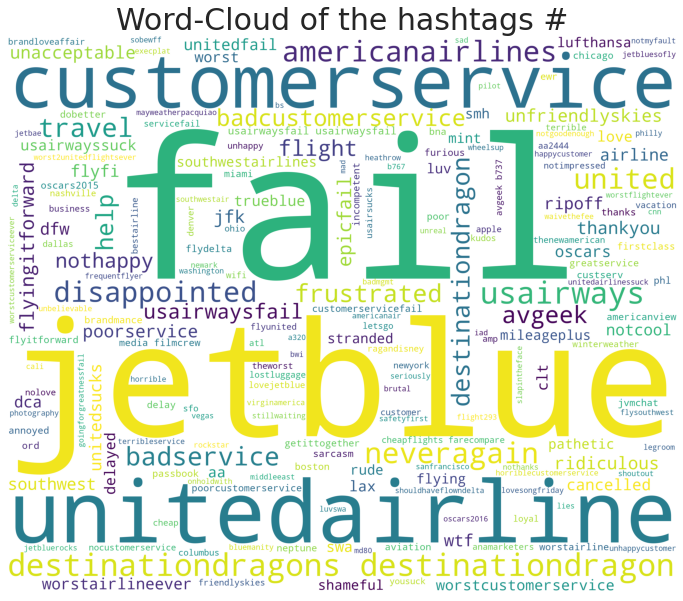

CPU times: user 20.2 s, sys: 391 ms, total: 20.5 s
Wall time: 20.5 s


In [ ]:
%%time
wordcloud = WordCloud(
                      background_color='white',
                      width=3000,
                      height=2500
                    ).generate(str_hashtags)

plt.figure(1,figsize=(12, 12))
plt.title("Word-Cloud of the hashtags #",
          fontsize=30)
plt.imshow(wordcloud)
plt.axis('off')
plt.show() 

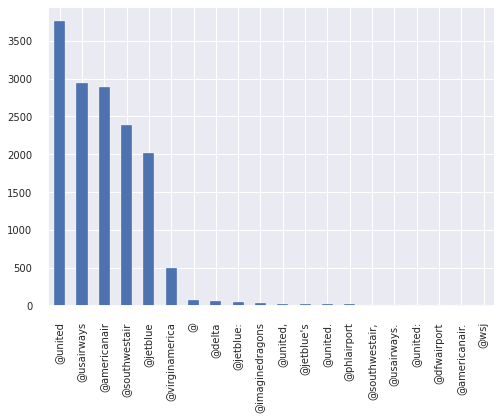

In [ ]:
# top 20 occuring mentions  
# words = ' '.join(df_tweets['text'])

list_mentions = [ x.lower() for x in words.split() if x.startswith("@")]
pd.Series(list_mentions, 
          index=None).value_counts(sort=True).head(20).plot(kind="bar")

# 3. Data Pre-Processing

The "text" feature would be used for Sentiment analysis on target variable "airline_sentiment"


From Rubiric,

Each text pre-processing step should be mentioned in the notebook separately. a. Html tag removal. b. Tokenization. c. Remove the numbers. d. Removal of Special Characters and Punctuations. e. Removal of stopwords f. Conversion to lowercase. g. Lemmatize or stemming. h. Join the words in the list to convert back to text string in the data frame. (So that each row contains the data in text format.) i. Print the first 5 rows of data after pre-processing.

In [ ]:
# make a copy of dataset, 
# keeping only relevant features containing information 
df_data = df_tweets[["text","airline_sentiment"]]
df_data

text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                                                                                       ...   
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  
0       neutral          
1      positive          
2       neutral          
3      negative          
4      negative          
...                 ...  
14635  positive          
14636  negative          
14637   neutral          
14638  negative          
14639   neutral          

[14640 rows x 2 columns]

In [ ]:
df_data.sample(20)

text                                                                                                                                                 \
10707                                                         @USAirways 13 years of Naval Service and I run the travel department for all my commands...   
7391                  @JetBlue sadly, no! I have the app, but it also is experiencing difficulties. The flight information boards are keeping me updated.   
7299                        @JetBlue I thought being a mosaic member had 'perks' the best part is instead of checking the extra 5lbs I'm carrying it on 😒   
11753              @USAirways @AmericanAir  we are on us/aa flight 4443.We  arrived at dca at 2:12. Waiting on our gate (33)for apx an hr now. No update?   
6670            @SouthwestAir 45mins wait on the phone with no option for a callback? Finally had to hang up because my phone was dying. #customerservice   
6722                                               @SouthwestAir Cancelled Flightled my flight out of BNA today. Been on hold for an hour. 😠 #frustrated!   
8325                     @JetBlue My card company and I explained the issue over the phone when I was in Mexico. I purchased a new ticket over the phone.   
12880                                                    @AmericanAir My chariot tonight. From this angle it looks like a 787, no? http://t.co/3ZZKQWWbJz   
3522                                    @united @UnitedFlyerHD @United_Airline N26902 Dreamliner leaves London Heathrow. @B787fans http://t.co/aI0Yzwt8Za   
12019                                           @AmericanAir my flight to DFW from LIT on my way to PDX tomorrow was Cancelled Flighted. Can you help me?   
5489                           @SouthwestAir my son is flying South West from NOLA-Orlando, hope to enter for him to win this contest #DestinationDragons   
13804                                                                                 @AmericanAir no worries you're swamped I know just dmd back THANK U   
8420                                                                  @JetBlue OH YEAH!!! great flight down to Mexico with a wonderful crew!! Thank you!!   
8377   @JetBlue tickets were confirmed and sent out. find out today that they Cancelled Flightled our tickets months ago and never sent an email #jetblue   
11328                                        @USAirways The captain turned off the seat belt sign so people can get up and walk around.  That's not good.   
7984                                                                                                              @JetBlue y'all got prices for the low??   
12217                    @AmericanAir since you don't care about what happens to your passengers on your planes we will now be contacting the Police Dept   
2373                  @united You really should clean the food and coffee stains off of the area around the seats when new passengers come aboard. Gross!   
1482                                                                                               @united I did. It took about an hour and a half though   
8466              @JetBlue Amazingly Awesome customer service from your reservation agents tonight. Helping correct a mistake. I so love this airline. :)   

      airline_sentiment  
10707  negative          
7391   negative          
7299   negative          
11753  negative          
6670   negative          
6722   negative          
8325    neutral          
12880   neutral          
3522    neutral          
12019   neutral          
5489    neutral          
13804   neutral          
8420   positive          
8377   negative          
11328  negative          
7984    neutral          
12217  negative          
2373   negative          
1482   negative          
8466   positive

### Observation by Sanjib:

Following pre-processing of text are required:


1. Replace contractions in string (e.g. replace "I'm" with "I am")

2. Remove : (They do not contribute to sentiments)

  2.1 Remove HTML Tags.
  
  2.2 Remove numbers.

  2.3 Remove tags starting with '@', '$'. 
  
  (Note: Some hashtags starting with '#' contains sentiments, as we observed during EDA)

  2.4 Removal of URL’s.

  2.5 Removal of Punctuations.
  

3. Replacement:

  3.1 Replace the emoji with words, which are meaningful to sentiment. Examples, 👎	
   
  3.2 Replace emojicons (e.g. :>, :-< ) with meaningful words>  
  
4. Removal of non-ASCII characters.
    
5. Conversion of all characters to lowercase.

6. Tokenize text. Remove Stopwords. Before removing shortlist the stopwords that are meaningful to determine sentiment.

7. Spelling Correction. (Note: Tweets have usually spelling mistakes)

8. Lemmatize text. (preffered over stemming)



## 3.1 Toeknization

Followed by WordCloud Visualization

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.word_tokenize(
    "I've tried both desktop and mobile, :-() http://t.co/AvyqdMpi1Y.	negative 😭😭	")

# df_clean_tweet['clean_text'] = df_clean_tweet.apply(lambda row: nltk.word_tokenize(row['clean_text']), 
#                                                  axis=1) # Tokenization of data
# df_clean_tweet                                                 

['I',
 "'ve",
 'tried',
 'both',
 'desktop',
 'and',
 'mobile',
 ',',
 ':',
 '-',
 '(',
 ')',
 'http',
 ':',
 '//t.co/AvyqdMpi1Y',
 '.',
 'negative',
 '😭😭']

### Observation by Sanjib:

  1. The tokenization breaks an URL. Entire URL needs to be removed, because URL contains no information regarding sentiment classification.

  For the time being, we'll proceed with normalization only, as follows.



## 3.2 Normalization

In [ ]:
%%time

# Spelling Correction: unit testing the libray with one smaple, 
str(TextBlob(
"I'll book my next Christmas vacatinn this Deceber any other ways you want to devalue mileage plus."
).correct())


CPU times: user 399 ms, sys: 2 ms, total: 401 ms
Wall time: 399 ms


"I'll book my next Christmas vacation this December any other ways you want to value mileage plus."

###Observation by Sanjib:

  1. The spelling check operation comsumes significant time. This needs to be performed after words are removed.

In [ ]:
# emoji
%%time
# import emoji
emoji.demojize("united :-( customer service 👎", delimiters=("",""))

CPU times: user 67.6 ms, sys: 2.98 ms, total: 70.5 ms
Wall time: 69.6 ms


'united :-( customer service thumbs_down'

In [ ]:
%%time 
text = "@United I am delighted ✈️ 😃 👍"
print (emoji.demojize( text,  delimiters=("","")) )

@United I am delighted airplane grinning_face_with_big_eyes thumbs_up
CPU times: user 314 µs, sys: 16 µs, total: 330 µs
Wall time: 335 µs


In [ ]:
%%time
def replace_emojicons(str_p : str):
    """
      Desc: Replace following emoticons with meaningful
            words - happy, disgusting, surprise  
      Params:
        str_p : str = string where to replace
      Returns:
        str = string after replace
    """    
    # start_time = datetime.now()

    ##
    for ch in [":)", ":):)", ":-)", ":-))", ":-3", ":3"
               ":-{)", ":-):-)", ":-]", ":->", ":>", "8)",
               "8-)", ":-}", ":}", ":o)", "=3", "B^D", 
               ":c)", "c:", ":c)" "C:", ":^)", "=]", "=)",
               ";D", ";>", ";)", ";-)", ";]", ";-]", ";>",
               "O:-)", "O:)", "0:-3", "0:)", "0:-)", "0:)",
               "(^_^)/", "(^O^)／", "(＾ｖ＾)", ";p"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " happy " )

        

    ##
    for ch in [":(", ":(:(", ":-(", ":-c", ":c", ":-<", 
               ":<", ":-[", ":[", ":-[", ":-||", ">:[",  
               ":-{(", ":-(:-(", ":{", ":@", ";(", ":'(",
               ":'-(", ":=(", "D-'", "D:<", "D:", "D8",
               "D;", "D=", "DX", ":S", ":-/", ":/", ">:\\",
               ">:/", ":L", "8====D", "</3", "<\3", "8-X",
               "8=X", "x-3", "x=3"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " disgusting " )

    ##
    for ch in [":O", ":-O", ":o", ":-o", "8-0", ">:O",
               ":0", ":-0", "(@_@)", "(*_*)"]:
      if ch in str_p:
        str_p = str_p.replace(ch, " surprise " )

    # print("replace_emojicons() duration {}".format(
    # datetime.now() - start_time))      

    return str_p


 # unit testing 
replace_emojicons("united :-( customer service 👎")


CPU times: user 14 µs, sys: 1 µs, total: 15 µs
Wall time: 17.4 µs


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

stopwords = stopwords.words('english')
stopwords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
%%time

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', 
              "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 
              'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', 
              "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', 
              "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', 
              "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, 
# so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 
stopwords.append("w/")     

lemmatizer = WordNetLemmatizer()



############################################
def lemmatize_list(words):
    """Lemmatize"""
    # start_time = datetime.now()   
    # new_words = []
    # for word in words.split():
    #   new_words.append(" ")
    #   new_words.append(lemmatizer.lemmatize(word, pos='v'))

    new_words = [lemmatizer.lemmatize(word, 
                      pos='v') for word in words.split()]
 
    # print("lemmatize_list() duration = {}".format(
    #   datetime.now() - start_time))     
    return " ".join(new_words)

# Examples : Unit testing
text = "Couldn't make changes online and after 90 mins on hold and time" +\
" dealing w/ the rude rep, the 24 hour window has closed."
print("Testing lemmatize_list :" ,
      lemmatize_list(text) )



Testing lemmatize_list : Couldn't make change online and after 90 mins on hold and time deal w/ the rude rep, the 24 hour window have closed.
CPU times: user 1.5 s, sys: 75.1 ms, total: 1.58 s
Wall time: 1.55 s


In [ ]:
%%time

# Examples : Unit testing
text = "@united I had one interview I was the last person what does that mean?"
print("Testing lemmatize_list :" ,
      lemmatize_list(text) )

Testing lemmatize_list : @united I have one interview I be the last person what do that mean?
CPU times: user 332 µs, sys: 17 µs, total: 349 µs
Wall time: 232 µs


In [ ]:
%%time 
text = "united :-( customer service 👎. I am disappointed"
unicodedata.normalize('NFKD', text).encode('ascii', 
          'ignore').decode('utf-8', 'ignore')

CPU times: user 9 µs, sys: 1e+03 ns, total: 10 µs
Wall time: 11.2 µs


In [ ]:
%%time

############################################
def strip_html(text):
    # start_time = datetime.now()
    soup = BeautifulSoup(text, "html.parser")  
    # print("remove_numbers duration {}".format(
    # datetime.now() - start_time))                  
    return soup.get_text()

# Examples : Unit testing
text = "<h1>This is my website</h1>"
print("Testing strip_html :" ,
      strip_html(text) )


Testing strip_html : This is my website
CPU times: user 0 ns, sys: 370 µs, total: 370 µs
Wall time: 327 µs


In [ ]:
%%time

# Examples : Unit testing
text = "<h1>This is my website</h1><h2>Details here</h2>"
print("Testing strip_html :" ,
      strip_html(text) )


Testing strip_html : This is my websiteDetails here
CPU times: user 304 µs, sys: 15 µs, total: 319 µs
Wall time: 273 µs


In [ ]:


############################################

def remove_numbers(text):
  #remove the numericals present in the text
  # start_time = datetime.now()
  text = re.sub(r'\d+', '', text)
  # print("remove_numbers duration {}".format(
  #     datetime.now() - start_time))
  return text

# Examples : Unit testing
text = "@united A change fee of $200. Same exact flight from ATL-HOU is " +\
"$165. Why a charge of $574? The math doesn't add up."
print("Testing remove_numbers :" ,remove_numbers(text) )

############################################
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    # start_time = datetime.now()

    new_words = unicodedata.normalize('NFKD', 
                      words).encode('ascii', 
                                  'ignore').decode('utf-8', 'ignore')
    # print("remove_non_ascii() duration = {}".format(
    # datetime.now() - start_time))  
    return new_words

# Examples : Unit testing
text = "united :-( customer service 👎"
print("Testing remove_non_ascii() :" ,
      remove_non_ascii(text) )

############################################
# def to_lowercase(words):
#     """Convert all characters to lowercase from list of tokenized words"""
#     new_words = []
#     for word in words.split():
#         new_words.append(" ")
#         new_word = word.lower()
#         new_words.append(new_word)
#     return "".join(new_words)

    
# # Examples : Unit testing
# text = "Flight Crew Availability is to blame? NEVER AGAIN with @United."
# print("Testing to_lowercase :" ,
#       to_lowercase(text) )

############################################
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    # start_time = datetime.now()
    new_words = []
    # for word in words.split():
        # as tweets may not have whitespace along with punctuations always,
        # we are going to add whitespace in place of punctuations 
    new_words = re.sub(r'[^\w\s]', ' ', words)
        # if new_word != ' ':
        #     new_words.append(" ")
        #     new_words.append(new_word)
    # print("remove_punctuation() duration = {}".format(
    # datetime.now() - start_time)) 
    return new_words

# Examples : Unit testing
text = "@united WTF!?!? Delay after delay. 15 hours YVR to SAN? Unacceptable."
print("Testing remove_punctuation() :" ,
      "".join(remove_punctuation(text)) )    

############################################
def remove_stopwords_lower(words):
    """Remove stop words from list of tokenized words"""
    # start_time = datetime.now()

    # new_words = []
    # for word in words.split():
    #     if word not in stopwords:
    #         new_words.append(" ")
    #         new_words.append(word)
    new_words = [word.lower() for word in words.split() \
                    if word not in stopwords]

    # print("remove_stopwords() duration = {}".format(
    # datetime.now() - start_time))         
    return " ".join(new_words)

# Examples : Unit testing
text = "Flight Crew Availability is to blame? NEVER AGAIN with @United."
print("Testing remove_stopwords_lower :" ,
      "".join(remove_stopwords_lower(text)) )



############################################
# # Function for url's
# def remove_urls(text):
#     # url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     # return url_pattern.sub(r'', text)
#     start_time = datetime.now()
#     text = re.sub(
#     'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',
#     '',text)
#     print("remove_urls() duration = {}".format(
#       datetime.now() - start_time))
#     return text

# # Examples : Unit testing
# text = "This is my website. Website is https://to.abc.com"
# print("Testing remove_urls() :" ,remove_urls(text) )


############################################

#expand the contractions

# def replace_contractions(text):
#     """Replace contractions in string of text"""
#     return contractions.fix(text)

# Examples : Unit testing
text = "Couldn't make changes online"
print("Testing replace_contractions :" ,
      contractions.fix(text) )


Testing remove_numbers : @united A change fee of $. Same exact flight from ATL-HOU is $. Why a charge of $? The math doesn't add up.
Testing remove_non_ascii() : united :-( customer service 
Testing remove_punctuation() :  united WTF     Delay after delay  15 hours YVR to SAN  Unacceptable 
Testing remove_stopwords_lower : flight crew availability blame? never again @united.
Testing replace_contractions : could not make changes online


In [ ]:
%%time
############################################


def remove_mention_number_dollar_url(text_p : str):
    """
      Description: 
        remove the followings in the tweets
        mention, decimal, integer, dollar-currency, 
        URL, punctuation
    """
    # start_time = datetime.now()

    text_p = re.sub(
    r'@\w+|\d+(\.\d*)?|\$|http[s]?://(?:' +\
    '[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'+\
    '' #'|[^\w\s]' # removing punctuation removed emoji
    ,
    '',text_p)

    # print(
    # "remove_mention_number_dollar_url_punctuation() duration = {}".format(
    #   datetime.now() - start_time))
    return text_p

# Examples : Unit testing
text = "@AmericanAir Please bring American Airlines to #BlackBerry10," +\
" at $0.0. Website is https://to.abc.com @AmericanAir.  😭😭	"
# print(text)
print("Testing remove_mention_number_dollar_url() :", 
      remove_mention_number_dollar_url(text) )

Testing remove_mention_number_dollar_url() :  Please bring American Airlines to #BlackBerry, at . Website is  .  😭😭	
CPU times: user 1.82 ms, sys: 0 ns, total: 1.82 ms
Wall time: 1.48 ms


In [ ]:
%%time
# Examples : Unit testing
text = "@AmericanAir Please bring American Airlines to #BlackBerry10," +\
" at $0.0. Website is https://to.abc.com @AmericanAir.  😭😭	"
# print(text)
print("Testing remove_mention_number_dollar_url() :", 
      remove_mention_number_dollar_url(text) )

Testing remove_mention_number_dollar_url() :  Please bring American Airlines to #BlackBerry, at . Website is  .  😭😭	
CPU times: user 84 µs, sys: 5 µs, total: 89 µs
Wall time: 86.3 µs


In [ ]:
%%time
"Here are ABC.".lower()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


'here are abc.'

In [ ]:
re.sub('[^\w\s]','',"thumbs_up") 

'thumbs_up'

In [ ]:
%%time

############################################
def normalize(words):
    """
      Desc: 
        Wrapper function of all text pre-processing
      Params:
        words : str 
      Return:
        str = Cleaned Text  
    """

    """


    1. Replace contractions in string (e.g. replace "I'm" with "I am")

    2. Remove : (They do not contribute to sentiments)

      2.1 Remove HTML Tags.
      
      2.2 Remove numbers.

      2.3 Remove tags starting with '@', '$'. 
      
      (Note: Some hashtags starting with '#' contains sentiments, as we observed during EDA)

      2.4 Removal of URL’s.

      2.5 Removal of Punctuation.
      

    3. Replacement:

      3.1 Spelling Correction. (Note: Tweets have )

      3.3 Replace the emoji with words, which are meaningful to sentiment. Examples, 👎	
      
      3.4 Replace emojicons (e.g. :>, :-< ) with meaningful words>  

      
    4. Removal of non-ASCII characters.
        
    5. Conversion of all characters to lowercase.

    6. Tokenize text. Remove Stopwords. Before removing,
    please shortlist the stopwords that are meaningful to determine sentiment.

    7. Lemmatize text. (preffered over stemming)


    """

    strip_html



    words = remove_mention_number_dollar_url(words)
    
    # print(words)
    


    words = contractions.fix(words)
    # print(words)
    
    words = remove_stopwords_lower(words)
    # print(words)

    # words = remove_punctuation(words)
    # print(words)
    # words = remove_non_ascii(words)


    # words = to_lowercase(words)
    # words = words.lower()


    words = emoji.demojize(words, delimiters=(" "," "))
    words = replace_emojicons(words)
    # print(words)

    #remove punctuations
    words = re.sub('[^\w\s]','',words) 
    #remove non-ascii
    words = unicodedata.normalize('NFKD', words
          ).encode('ascii', 
          'ignore').decode('utf-8', 'ignore')

    # The spelling correction took long processing time
    # words = str(TextBlob(words).correct())

    words = lemmatize_list(words)
    return words

#Unit testing
print(normalize(
"I've tried both desktop and mobile, :-() http://t.co/AvyqdMpi1Y.	negative 😭😭	"))

i try desktop mobile disgust negative loudly_crying_face loudly_crying_face
CPU times: user 921 µs, sys: 0 ns, total: 921 µs
Wall time: 875 µs


In [ ]:
%%time 
#Unit testing
print(normalize(
"I've tried both desktop and mobile, :( http://t.co/AvyqdMpi1Y	negative 😭😭	"))

i try desktop mobile disgust negative loudly_crying_face loudly_crying_face
CPU times: user 610 µs, sys: 31 µs, total: 641 µs
Wall time: 614 µs


In [ ]:
%%time 

df_data["clean_text"] = df_data.apply(lambda row: normalize(row["text"]),
                                      axis=1)
df_data

CPU times: user 7.34 s, sys: 32.1 ms, total: 7.37 s
Wall time: 7.35 s


In [ ]:
# %%time
# np.vectorize(normalize)(df_data["text"])

In [ ]:
# save to disk
df_data.to_csv("/content/drive/MyDrive/Colab Notebooks/tweet-clean.csv",index=True)

In [ ]:
df_data.sample(20)

text                                                                                                                                                  \
10061                                                                            @USAirways 45 minutes and moved two feet in BZE. 👎 http://t.co/AwGjkjIIac   
973            @united Premier Gold desk changes flight. Waives fees. Gives me wrong flight. Now Jana Acosta in Salt Lake refuses the same service. Angry.   
4759          @SouthwestAir customer service is rude and bothered by our calls. Has no idea what is going on and sighed heavily on the phone. Unbelievable   
11762                                           @USAirways I hope flight 1855 is not being delayed because flight attendant didn't come to work! #nobackup   
4864                                                                     @SouthwestAir I changed my flight through St. Louis. Thanks for the reply though!   
10403                                                                                                 @USAirways can I get an update on flight 680 to DCA?   
7496                                                    @JetBlue any way to get 2 ppl on standby list for flight 1970 FLL to BOS. Trying to find way home.   
2074          @united your unhelpful team? Sure I did. I'm in Bangkok, my bag in Chicago. Are u going to pay for my accommodation s until my bag arrives??   
6359                  @SouthwestAir  flight at 630 from fll kiosk just opened. Rude attendants because now everyone is Late Flight. http://t.co/2Boh2Mh3cb   
56                                                                                 @VirginAmerica you know it. Need it on my spotify stat #guiltypleasures   
3044             @united instead of making  seats smaller/thinner so u can jam more people on a flight,u should concentrate on maint &amp; happy customers   
1050   @united really? 3 hr delay, 4 gate changes, &amp; you boarded us, sent us back up, &amp; boarded us again.  Won't change our flight. Can we go now?   
10375                      @USAirways is flt 680 en route to DCA or BWI after diverting to RDU. Your phone service  sucks and your website is conflicting.   
4253       @United WiFi onboard 737-800 far superior in pricing and performance (user-perceived bandwidth and Late Flightncy) to recent @GoGo experiences.   
10417                   @USAirways I'm on flight 623 from DIA to Ontario tomorrow morning. no access to the airport via taxi or shuttle. What should I do?   
8816                                          @JetBlue so happy you can accommodate peanut/treenut allergies on flight! 1st online cover from air provider   
12114                                                                                            @AmericanAir what's the status of flight 1357 out of sju?   
14012                                     @AmericanAir I really want to get home. Tonight, preferably. Please stop delaying my plane 😢😕😦 #AmericanAirlines   
3189                                                         @united @dmb41shows I need this plane to get to buffalo so I can leave tonight. Any progress?   
9077                            @USAirways your CSR in PHL suck.   Flt 3883 gets cx'd,  i get rebooked to the next day?  On standby for 4011. Not hopeful.   

      airline_sentiment  \
10061  negative           
973    negative           
4759   negative           
11762  negative           
4864   positive           
10403   neutral           
7496    neutral           
2074   negative           
6359   negative           
56     positive           
3044   negative           
1050   negative           
10375  negative           
4253   positive           
10417   neutral           
8816   positive           
12114   neutral           
14012  negative           
3189   negative           
9077   negative           

      clean_text                                                                                                       

In [ ]:
# reading from disk to ensure that save was successful
df_clean_tweet = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tweet-clean.csv")

In [ ]:
df_clean_tweet

Unnamed: 0  \
0          0        
1          1        
2          2        
3          3        
4          4        
...           ...   
14635  14635        
14636  14636        
14637  14637        
14638  14638        
14639  14639        

      text                                                                                                                                                     \
0                                                                                                                         @VirginAmerica What @dhepburn said.   
1                                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.   
2                                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!   
3                              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse   
4                                                                                                     @VirginAmerica and it's a really big bad thing about it   
...                                                                                                                                                       ...   
14635                                                                                         @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc   
14637                                                                                            @AmericanAir Please bring American Airlines to #BlackBerry10   
14638                 @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??   
14639              @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?   

      airline_sentiment  \
0       neutral           
1      positive           
2       neutral           
3      negative           
4      negative           
...                 ...   
14635  positive           
14636  negative           
14637   neutral           
14638  negative           
14639   neutral           

      clean_text                                                                                     
0                                                                                          what say  
1                                                             plus add commercials experience tacky  
2                                                    i not today must mean i need take another trip  
3                   really aggressive blast obnoxious entertainment guests face amp little recourse  
4                                                                              really big bad thing  
...                                                                                             ...  
14635                                                            thank get different flight chicago  
14636  leave minutes late flight no warn communication minutes late flight call shitty customer svc  
14637                                                     please bring american airlines blackberry  
14638                        money change flight not answer phone any suggestions i make commitment  
14639                     ppl need know many seat next flight plz put us standby people next flight  

[14640 rows x 4 columns]

# 4. Feature Enggineering - Basic




## 4.1 Features of CountVectorizer 

In [ ]:
# bow_vec1 = CountVectorizer()  
# data_features1 = bow_vec1.fit_transform(
#     df_clean_tweet['clean_text'])

# data_features1 = data_features1.toarray()                        # Convert the data features to array.
# data_features1.shape

In [ ]:
# Keep only 2000 features as number of features will increase the processing time.
bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(
    df_clean_tweet['clean_text'].values.astype('U'))

data_features = data_features.toarray()  
data_features       

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
data_features.shape

(14640, 2000)

In [ ]:
# summarize
print(bow_vec.vocabulary_)

{'what': 1924, 'say': 1529, 'plus': 1326, 'add': 24, 'experience': 618, 'not': 1181, 'today': 1773, 'must': 1144, 'mean': 1075, 'need': 1157, 'take': 1712, 'another': 86, 'trip': 1804, 'really': 1417, 'blast': 218, 'entertainment': 577, 'face': 632, 'amp': 77, 'little': 1010, 'big': 206, 'bad': 162, 'thing': 1742, 'seriously': 1554, 'would': 1968, 'pay': 1277, 'flight': 685, 'seat': 1538, 'play': 1321, 'fly': 701, 'va': 1869, 'yes': 1984, 'nearly': 1156, 'every': 596, 'time': 1766, 'vx': 1889, 'go': 763, 'away': 155, 'happy': 796, 'miss': 1117, 'opportunity': 1226, 'without': 1953, 'hat': 801, 'there': 1739, 'well': 1921, 'now': 1190, 'do': 523, 'amaze': 71, 'arrive': 115, 'hour': 853, 'early': 547, 'good': 767, 'me': 1072, 'know': 963, 'suicide': 1687, 'second': 1540, 'lead': 984, 'death': 458, 'among': 75, 'lt': 1041, 'pretty': 1356, 'much': 1141, 'better': 202, 'this': 1746, 'great': 770, 'deal': 456, 'already': 65, 'think': 1744, 'nd': 1154, 'even': 592, 'st': 1649, 'yet': 1986, 'f

### Observation by Sanjib:

1. Apparaently the selected features do not have spelling mistakes.




## 4.2 Features of TF-IDF Vectorizer

In [ ]:
# create the transform
tf_idf_vectorizer = TfidfVectorizer(max_features=2000)
# tokenize and build vocab
data_features_tf_idf = tf_idf_vectorizer.fit_transform(
    df_clean_tweet['clean_text'].values.astype('U'))

data_features_tf_idf = data_features_tf_idf.toarray()

data_features_tf_idf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# summarize
data_features_tf_idf.shape

(14640, 2000)

In [ ]:
# summarize
print(tf_idf_vectorizer.vocabulary_)
print(tf_idf_vectorizer.idf_)

{'what': 1924, 'say': 1529, 'plus': 1326, 'add': 24, 'experience': 618, 'not': 1181, 'today': 1773, 'must': 1144, 'mean': 1075, 'need': 1157, 'take': 1712, 'another': 86, 'trip': 1804, 'really': 1417, 'blast': 218, 'entertainment': 577, 'face': 632, 'amp': 77, 'little': 1010, 'big': 206, 'bad': 162, 'thing': 1742, 'seriously': 1554, 'would': 1968, 'pay': 1277, 'flight': 685, 'seat': 1538, 'play': 1321, 'fly': 701, 'va': 1869, 'yes': 1984, 'nearly': 1156, 'every': 596, 'time': 1766, 'vx': 1889, 'go': 763, 'away': 155, 'happy': 796, 'miss': 1117, 'opportunity': 1226, 'without': 1953, 'hat': 801, 'there': 1739, 'well': 1921, 'now': 1190, 'do': 523, 'amaze': 71, 'arrive': 115, 'hour': 853, 'early': 547, 'good': 767, 'me': 1072, 'know': 963, 'suicide': 1687, 'second': 1540, 'lead': 984, 'death': 458, 'among': 75, 'lt': 1041, 'pretty': 1356, 'much': 1141, 'better': 202, 'this': 1746, 'great': 770, 'deal': 456, 'already': 65, 'think': 1744, 'nd': 1154, 'even': 592, 'st': 1649, 'yet': 1986, 'f

# 5. Data Split

Spilt the dataset into -

train :: test = 80 :: 20

Assumption : The cross-validation would be part of the algorithm  

In [ ]:
# To achieve consistency
seed_value = 7

np.random.seed(seed_value)
tf.random.set_seed(seed_value)

y=df_clean_tweet["airline_sentiment"] 
y.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
# Encode classes into numbers
y = y.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: uint8

## 5.1 TF-IDF Features

In [ ]:
%%time

# Split dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    pd.DataFrame( data_features_tf_idf, 
                 index=df_clean_tweet.index,
                 dtype="float32"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (11712, 2000)
X_test (2928, 2000)
y_train (11712,)
y_test (2928,)
CPU times: user 63.9 ms, sys: 15.1 ms, total: 79 ms
Wall time: 77.2 ms


In [ ]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train.value_counts(normalize=True))
print("="*40)
print(y_test.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6269
1   0.2117
2   0.1615
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712 entries, 13285 to 5361
Columns: 2000 entries, 0 to 1999
dtypes: float32(2000)
memory usage: 89.4 MB


In [ ]:
X_train.sample(10)

0      1      2      3      4      5      6      7      8      9      \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       10     11     12     13     14     15     16     17     18     19     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       20     21     22     23     24     25     26     27     28     29     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       30     31     32     33     34     35     36     37     38     39     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.2241 0.0000   
779   0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
12625 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
4208  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
11229 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   

       40     41     42     43     44     45     46     47     48     49     \
1415  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6861  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6554  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
6949  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
7609  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000   
1461  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.000

In [ ]:
y_train

13285    0
1040     0
8148     1
3671     0
5430     0
        ..
9552     0
4645     2
14124    0
13088    0
5361     0
Name: airline_sentiment, Length: 11712, dtype: uint8

In [ ]:
# %%time

# # Split dataset into validation and test

# X_val, X_test, y_val, y_test = train_test_split(
#     X_test,
#     y_test, 
#     test_size=0.5, 
#     random_state=10,
#     stratify=y_test)


# print("X_val", X_val.shape)
# print("X_test", X_test.shape)
# print("y_val", y_val.shape)
# print("y_test", y_test.shape)

In [ ]:
# # check if the distrution of target classes are preserved after dataset split

# print(y.value_counts(normalize=True))
# print("="*40)
# print(y_val.value_counts(normalize=True))
# print("="*40)
# print(y_test.value_counts(normalize=True))
# print("="*40)

## 5.2 Count Vectorizer (Bag of Words) Features

In [ ]:
# Big of Word, Count Vectorizer

print(data_features.max(), data_features.min(), data_features.mean())

32 0 0.004294296448087431


In [ ]:
data_features


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
%%time

# Split dataset into train and test

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(
    pd.DataFrame( data_features, 
                 index=df_clean_tweet.index,
                 dtype="uint8"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train_bow", X_train_bow.shape)
print("X_test_bow", X_test_bow.shape)
print("y_train_bow", y_train_bow.shape)
print("y_test_bow", y_test_bow.shape)

X_train_bow (11712, 2000)
X_test_bow (2928, 2000)
y_train_bow (11712,)
y_test_bow (2928,)
CPU times: user 41 ms, sys: 18 ms, total: 59 ms
Wall time: 58.1 ms


In [ ]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train_bow.value_counts(normalize=True))
print("="*40)
print(y_test_bow.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6269
1   0.2117
2   0.1615
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64


In [ ]:
X_train_bow.sample(10)

0     1     2     3     4     5     6     7     8     9     10    11    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     0     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   0     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       12    13    14    15    16    17    18    19    20    21    22    23    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     1     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   0     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       24    25    26    27    28    29    30    31    32    33    34    35    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     0     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   1     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       36    37    38    39    40    41    42    43    44    45    46    47    \
7159   0     0     0     0     0     0     0     0     0     0     0     0      
9173   0     0     0     0     0     0     0     0     0     0     0     0      
5897   0     0     0     0     0     0     0     0     0     0     0     0      
6503   0     0     0     0     0     0     0     0     0     0     0     0      
2875   0     0     0     0     0     0     0     0     0     0     0     0      
6938   0     0     0     0     0     0     0     0     0     0     0     0      
11464  0     0     0     0     0     0     0     0     0     0     0     0      
5197   0     0     0     0     0     0     0     0     0     0     0     0      
6342   0     0     0     0     0     0     0     0     0     0     0     0      
13055  0     0     0     0     0     0     0     0     0     0     0     0      

       48    49    ...  1950  1951  1952  1953  1954  1955  1956  1957  1958  \
7159   0     0     ...  0     0     0     0     0     0     0     0     0      
9173   0     0     ...  0     0     0     0     0     0     0     0     0      
5897   0     0     ...  0     0     0     0     0     0     0     0     0      
6503   0     0     ...  0     0     0     0     0     0     0     0     0      
2875   0     0     ...  0     0     0  

# 6. Build Model - Traditional RandomForest


Please note that many different algorithms of multi-class classification could have been tried, such as pruned Decision Tree, Random Forest, Ada boost, XGBoost, Simple Artificial Neural Network, etc.

However, deep learning models proforms normally better in NLP classification. They were tried subsequently. 

Note: Vader Analysis, TextBolb are not generally great at performance. We are going for better alogorithms next.


## 6.1 Random Forest Model with TF-IDF features

In [ ]:
rf_tf = RandomForestClassifier(
    random_state=10,
    n_estimators=10, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_tf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [ ]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(8,22),
    "max_features": [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    "max_samples": [ 0.7, 0.8, 0.9, 1],
    "n_estimators": [8, 10, 20, 40, 60],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_tf.fit(X_train, y_train) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }

# scoring = make_scorer(f1_score, average = 'weighted')
scoring = make_scorer(accuracy_score)

# Run the Randomized search
randomCV_obj = RandomizedSearchCV(
            estimator=rf_tf, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="AUC", 
            cv=5, 
            n_iter=10)

randomCV_obj = randomCV_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_class_randomCV = randomCV_obj.best_estimator_

# Fit the best algorithm to the data.
rf_class_randomCV.fit(X_train, y_train)

CPU times: user 1min 23s, sys: 2.11 s, total: 1min 25s
Wall time: 8min 4s


In [ ]:
rf_class_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 19,
 'max_features': 0.8,
 'max_leaf_nodes': None,
 'max_samples': 0.8,
 'min_impurity_decrease': 0.0001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [ ]:
def get_metrics_score(
    model, train, test, train_y, test_y, threshold=0.5, flag=True, roc=False, desc=""
):
    """
    Description:
        Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    Parameters:
        desc: a description that would be added to the output result
        model: classifier to predict values of X
        train, test: Independent features
        train_y,test_y: Dependent variable
        threshold: thresold for classifiying the observation as 1
        flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
        roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    Returns:
        list with train and test scores
    """

    # defining an empty list to store train and test results

    score_list = []

    pred_train = model.predict(train) 
    # print(pred_train)
    # > threshold  # predict_proba
    pred_test = model.predict(test)
    # print(pred_test) 
    # > threshold

    # pred_train = np.round(pred_train)
    # pred_test = np.round(pred_test)

    train_acc = accuracy_score(pred_train, train_y)
    test_acc = accuracy_score(pred_test, test_y)

    train_recall = recall_score(train_y, pred_train, average='weighted')
    test_recall = recall_score(test_y, pred_test, average='weighted')

    train_precision = \
      precision_score(train_y, pred_train, average='weighted')
    test_precision = \
      precision_score(test_y, pred_test, average='weighted')

    train_f1 = f1_score(train_y, pred_train, average='weighted')
    test_f1 = f1_score(test_y, pred_test, average='weighted')

    # *********************************************************
    # NOTE : Because Average is chosen as "weighted", 
    # Accuracy-Test == Recall-Test
    # *********************************************************

    df_score = pd.DataFrame(dtype="float16")

    df_score["Description"] = (desc,)
    # df_score["Threshold"] = (threshold,)
    df_score["Accuracy-Train"] = (train_acc,)
    df_score["Accuracy-Test"] = (test_acc,)
    df_score["Precision-Train"] = (train_precision,)
    df_score["Precision-Test"] = (test_precision,)
    df_score["Recall-Train"] = (train_recall,)
    df_score["Recall-Test"] = (test_recall,)
    df_score["F1-Train"] = (train_f1,)
    df_score["F1-Test"] = (test_f1,)
    # df_score["ROC-AUC-Train"] = (np.nan,)
    # df_score["ROC-AUC-Test"] = np.nan

    # if roc == True:  # calculate ROC-AUC if flag is true
    #     pred_train_prob = model.predict(train)  # predict_proba
    #     pred_test_prob = model.predict(test)
    #     df_score.at[0, "ROC-AUC-Train"] = roc_auc_score(
    #         train_y, pred_train, average="weighted", multi_class='raise')
    #     df_score.at[0, "ROC-AUC-Test"] = roc_auc_score(
    #         test_y, pred_test, average="weighted", multi_class='raise')

    if flag == True:
        print(df_score)

    return df_score



def make_confusion_matrix(model, X_test, y_test,
            # history, 
            desc="", CATEGORIES=[0,1,2]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float = accuracy in training dataset
        acc_val : float = accuracy in validation dataset
        CATEGORIES : list of class names
        desc : str = description of model  
    Returns:
        Dataframe containing accuracy, precision, recall values
  """

  
  # print(CATEGORIES)

  # Confusion Matrix, multi-class
  cf_matrix = confusion_matrix(
      y_test,
      model.predict(X_test)
            )
  # print(cf_matrix)
  # Confusion matrix normalized per category true value
  # cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)


  plt.figure(figsize=(10,8))
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix, xticklabels=CATEGORIES, 
              yticklabels=CATEGORIES, annot=True,
              cmap="YlGnBu", fmt="")
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.title(desc)
  # sns.set_context("notebook")  # talk : bolds the plots

  # return pd.DataFrame( {"Description": desc, 
  #                       "Accuracy-Train": accuracy_train,
  #                       "Accuracy-Validation": accuracy_val,
  #                       "Accuracy-Test": accuracy_test,
  #                       "Recall-Test": recall_test,
  #                       "Precision-test" : precision_test,
  #                       "F1-Test": f1_test
  #                       },
  #                     index=[0] )




In [ ]:
#test dataset is unseen

df_score_rf_randomCV = get_metrics_score(
    rf_class_randomCV,
    X_train,
    X_test,  # unseen data
    y_train,
    y_test,  # unseen data
    desc="RandomForest TF-IDF",
    roc=True,
)

  Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.7038          0.6714         0.8008             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7549          0.7038        0.6714       0.7237    0.6918    


In [ ]:
df_score_rf_randomCV 


Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.7038          0.6714         0.8008             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7549          0.7038        0.6714       0.7237    0.6918

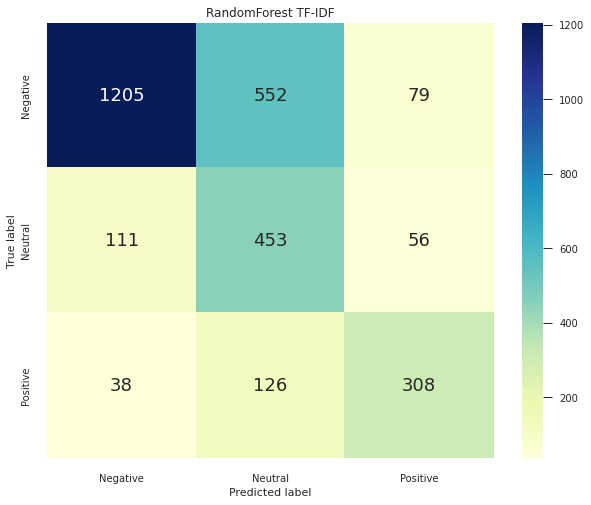

In [ ]:
make_confusion_matrix(rf_class_randomCV, 
                      X_test=X_test,y_test=y_test,
                      desc="RandomForest TF-IDF",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [ ]:
rf_class_randomCV.feature_importances_

array([6.82245602e-04, 4.60955851e-05, 2.38093403e-04, ...,
       0.00000000e+00, 8.42547755e-06, 0.00000000e+00])

In [ ]:
tf_idf_vectorizer.get_feature_names()

['aa',
 'aadvantage',
 'able',
 'about',
 'abq',
 'absolute',
 'absolutely',
 'absurd',
 'abt',
 'ac',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'accommodations',
 'accord',
 'account',
 'acct',
 'accurate',
 'across',
 'act',
 'action',
 'actual',
 'actually',
 'add',
 'additional',
 'address',
 'admirals',
 'advance',
 'advantage',
 'advertise',
 'advice',
 'advise',
 'advisory',
 'affect',
 'afford',
 'after',
 'afternoon',
 'again',
 'age',
 'agency',
 'agent',
 'agents',
 'ago',
 'agree',
 'ah',
 'ahead',
 'ahold',
 'air',
 'aircraft',
 'airfare',
 'airline',
 'airlines',
 'airplane',
 'airport',
 'airports',
 'airways',
 'alert',
 'alist',
 'all',
 'alliance',
 'allow',
 'almost',
 'alone',
 'along',
 'already',
 'alright',
 'also',
 'alternate',
 'although',
 'always',
 'amaze',
 'america',
 'american',
 'americanairlines',
 'among',
 'amount',
 'amp',
 'an',
 'and',
 'angry',
 'anniversary',
 'announce',
 'announcement',
 'announcements',
 'annoy',
 'another',
 'ans

In [ ]:
# re-usable function


def feature_importance_in_tree(dTree, 
                               vectorizer,
                               feature_names=[], 
                               no_top_features=20,
                               model_name=""):
    """
    Description:
        Display importance of features in the tree building , by Gini importance
    Parameters:
        dTree : Descision Tree Model
        feature_names : list of independent variable names
    Returns:
        dataframe containing the feature importance, sorted decending
    """

    df_imp = pd.DataFrame(
        dTree.feature_importances_,
        columns=["Importance"],
        index=feature_names,
    ).sort_values(by="Importance", ascending=False)

    df_imp = df_imp.head( no_top_features )

    names = vectorizer.get_feature_names()
    # count = 0
    names_dict = {}
    for i in np.arange(0,len(names)):
      # print(names[i])
      names_dict[i] = names[i]

    # print(names_dict)

    df_imp["Feature"]= df_imp.index.map(names_dict)

    print(df_imp)

    # sns.set_context("talk")  # talk : bolds the plots

    print("*"*60)
    print("The plot of Feature Importance, top", 
          str(no_top_features))

    # fig, axs = plt.subplots(figsize=(20, 5))
    # df_imp.plot(kind="bar", ax=axs, color="Green")
    # plt.title("Feature Importances")
    # plt.xlabel("Relative Importance")
    sns.catplot(
        data=df_imp,
        y="Feature",
        x="Importance",
        kind="bar",
        height=10
    )
    plt.show()

    # sns.set_context("notebook")  # reset to normal

    wordcloud = WordCloud(
                      background_color='grey',
                      width=2000,
                      height=1500,
    ).generate(" ".join(df_imp["Feature"]))

    print("*"*60)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.figure(1, figsize=(20, 15))
    plt.title('Top '+ str(no_top_features) +\
              ' features WordCloud', fontsize=30)
    plt.axis("off")
    plt.show()              

    return df_imp




      Importance Feature    
1733 0.2322            thank
1181 0.0716              not
770  0.0410            great
1035 0.0347             love
469  0.0283            delay
796  0.0259            happy
834  0.0247             hold
270  0.0199           cancel
1890 0.0156             wait
854  0.0151            hours
431  0.0146         customer
272  0.0144           cannot
71   0.0134            amaze
200  0.0128             best
156  0.0108          awesome
685  0.0096           flight
1968 0.0082            would
265  0.0081             call
820  0.0077               hi
167  0.0072              bag
1964 0.0067            worst
767  0.0066             good
268  0.0058              can
1028 0.0057             lose
185  0.0052               be
1323 0.0050           please
1159 0.0049            never
106  0.0049       appreciate
755  0.0048              get
1157 0.0042             need
1557 0.0041          service
520  0.0040               dm
963  0.0039             know
1777 0.0038   

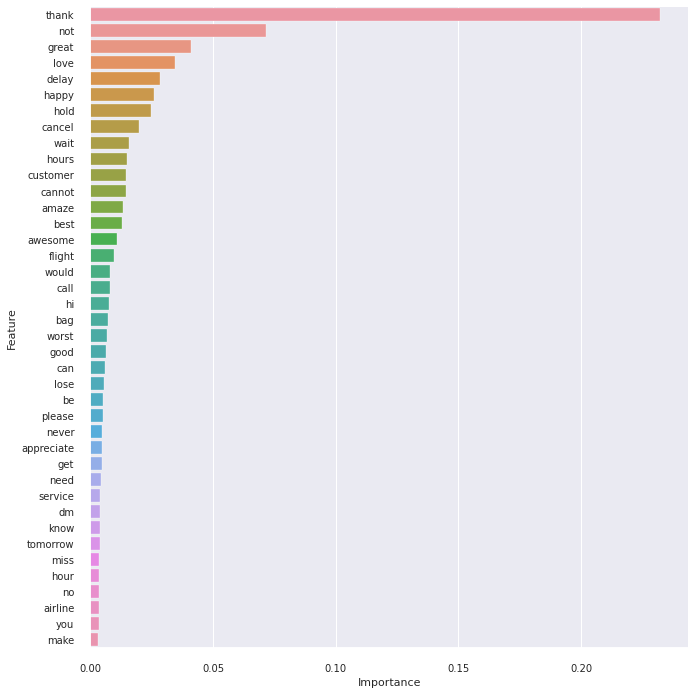

************************************************************


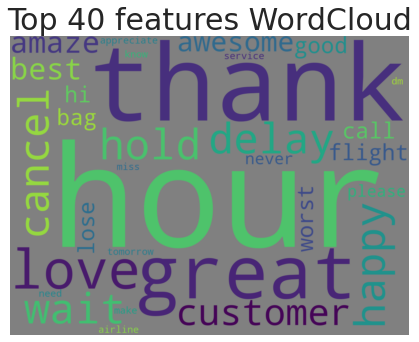

In [ ]:
df_imp = feature_importance_in_tree(
    dTree=rf_class_randomCV, 
    vectorizer=tf_idf_vectorizer,
    feature_names=X_train.columns, 
    no_top_features = 40,
    model_name="RandomForest TF-IDF"
)

In [ ]:
df_imp

Importance Feature    
1733 0.2322            thank
1181 0.0716              not
770  0.0410            great
1035 0.0347             love
469  0.0283            delay
796  0.0259            happy
834  0.0247             hold
270  0.0199           cancel
1890 0.0156             wait
854  0.0151            hours
431  0.0146         customer
272  0.0144           cannot
71   0.0134            amaze
200  0.0128             best
156  0.0108          awesome
685  0.0096           flight
1968 0.0082            would
265  0.0081             call
820  0.0077               hi
167  0.0072              bag
1964 0.0067            worst
767  0.0066             good
268  0.0058              can
1028 0.0057             lose
185  0.0052               be
1323 0.0050           please
1159 0.0049            never
106  0.0049       appreciate
755  0.0048              get
1157 0.0042             need
1557 0.0041          service
520  0.0040               dm
963  0.0039             know
1777 0.0038         tomorrow
1117 0.0037             miss
853  0.0037             hour
1172 0.0037               no
51   0.0036          airline
1989 0.0036              you
1053 0.0031             make

## 6.2 Random Forest Model with Count Vectorizer (Bag of Words) features

In [ ]:
rf_bow = RandomForestClassifier(
    random_state=10,
    n_estimators=20, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_bow.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [ ]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(8,22),
    "max_features": [ 0.7, 0.8, 0.9, 1],
    "max_samples": [ 0.6, 0.7, 0.8, 0.9, 1],
    "n_estimators": [ 10, 20, 40, 60],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_bow.fit(X_train_bow, y_train_bow) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }

# scoring = make_scorer(f1_score, average = 'weighted')
scoring = make_scorer(accuracy_score)


# Run the Randomized search
randomCV_obj_bow = RandomizedSearchCV(
            estimator=rf_bow, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="AUC", 
            cv=5, 
            n_iter=10)

randomCV_obj_bow = randomCV_obj_bow.fit(X_train_bow, 
                                        y_train_bow)

# Set the clf to the best combination of parameters
rf_bow_randomCV = randomCV_obj_bow.best_estimator_

# Fit the best algorithm to the data.
rf_bow_randomCV.fit(X_train_bow, y_train_bow)

CPU times: user 1min 31s, sys: 2.16 s, total: 1min 33s
Wall time: 7min 38s


In [ ]:
rf_bow_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 21,
 'max_features': 0.7,
 'max_leaf_nodes': None,
 'max_samples': 0.7,
 'min_impurity_decrease': 0.001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 60,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [ ]:
#test dataset is unseen

df_score_rf_bow_randomCV = get_metrics_score(
    rf_bow_randomCV,
    X_train_bow,
    X_test_bow,  # unseen data
    y_train_bow,
    y_test_bow,  # unseen data
    desc="RandomForest BOW",
    # roc=True,
)

  Description        Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest BOW 0.6480          0.6581         0.7388             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7443          0.6480        0.6581       0.6688    0.6787    


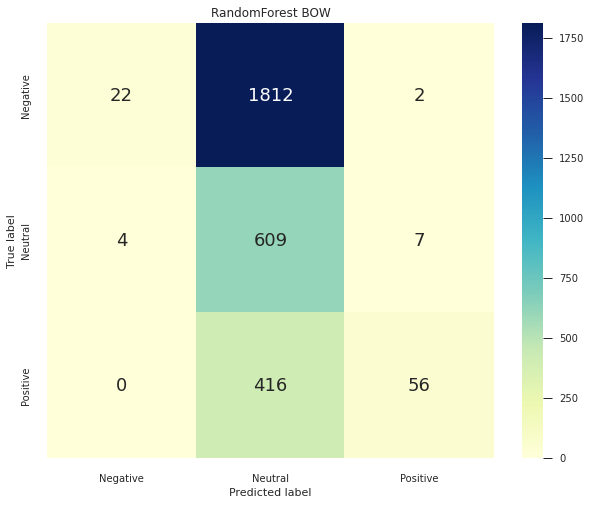

In [ ]:
make_confusion_matrix(rf_bow_randomCV, 
                      X_test=X_test,y_test=y_test,
                      desc="RandomForest BOW",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [ ]:
df_scores = pd.concat([df_score_rf_randomCV, df_score_rf_bow_randomCV],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test","F1-Test"], ascending=False)

Description           Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest TF-IDF 0.7038          0.6714         0.8008             
1     RandomForest BOW 0.6480          0.6581         0.7388             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7549          0.7038        0.6714       0.7237    0.6918    
1 0.7443          0.6480        0.6581       0.6688    0.6787

      Importance Feature    
1733 0.3323            thank
1181 0.0916              not
770  0.0605            great
1035 0.0451             love
469  0.0362            delay
834  0.0330             hold
796  0.0322            happy
270  0.0262           cancel
854  0.0260            hours
1890 0.0215             wait
71   0.0198            amaze
431  0.0171         customer
156  0.0161          awesome
272  0.0156           cannot
200  0.0154             best
1964 0.0119            worst
820  0.0114               hi
767  0.0108             good
265  0.0101             call
1028 0.0078             lose
167  0.0067              bag
1968 0.0065            would
1557 0.0064          service
1159 0.0058            never
1117 0.0056             miss
853  0.0047             hour
106  0.0045       appreciate
416  0.0044             crew
268  0.0044              can
51   0.0042          airline
520  0.0032               dm
185  0.0030               be
1989 0.0030              you
1323 0.0028   

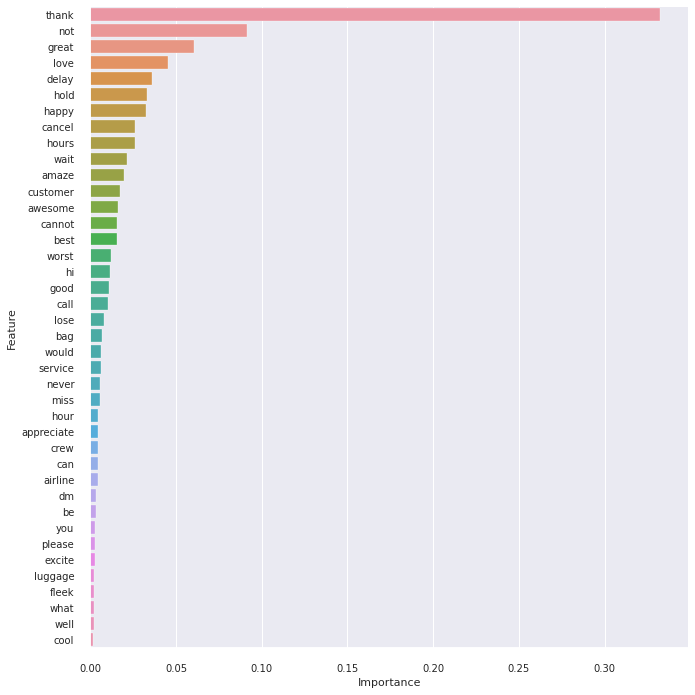

************************************************************


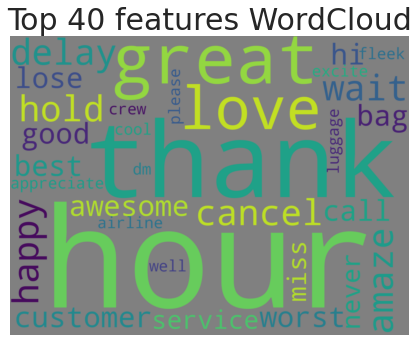

In [ ]:
df_imp = feature_importance_in_tree(
    dTree=rf_bow_randomCV, 
    vectorizer=bow_vec,
    feature_names=X_train_bow.columns, 
    no_top_features = 40,
    model_name="RandomForest BOW"
)


In [ ]:
df_imp

Importance Feature    
1733 0.3323            thank
1181 0.0916              not
770  0.0605            great
1035 0.0451             love
469  0.0362            delay
834  0.0330             hold
796  0.0322            happy
270  0.0262           cancel
854  0.0260            hours
1890 0.0215             wait
71   0.0198            amaze
431  0.0171         customer
156  0.0161          awesome
272  0.0156           cannot
200  0.0154             best
1964 0.0119            worst
820  0.0114               hi
767  0.0108             good
265  0.0101             call
1028 0.0078             lose
167  0.0067              bag
1968 0.0065            would
1557 0.0064          service
1159 0.0058            never
1117 0.0056             miss
853  0.0047             hour
106  0.0045       appreciate
416  0.0044             crew
268  0.0044              can
51   0.0042          airline
520  0.0032               dm
185  0.0030               be
1989 0.0030              you
1323 0.0028           please
608  0.0028           excite
1046 0.0022          luggage
681  0.0022            fleek
1924 0.0021             what
1921 0.0019             well
392  0.0017             cool

# 7. Word2Vec Model

skip gram word vectorization.

The model taken into account sequence of words together, trying to understand the context of sentences.


## 7.1 Word2Vec Model

In [ ]:
%%time
# tokenize
clean_tweet_tokenized = \
    df_clean_tweet["clean_text"].apply(
        lambda x : str(x).split() 
    )

clean_tweet_tokenized

CPU times: user 15.2 ms, sys: 4.01 ms, total: 19.2 ms
Wall time: 18.8 ms


In [ ]:
print(len(df_clean_tweet["clean_text"]),df_clean_tweet.shape[0])

14640 14640


In [ ]:
%%time
# size: The number of dimensions of the embeddings and the default is 100.
# window: The maximum distance between a target word and words around the target word. The default window is 5.
# min_count: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.
# workers: The number of partitions during training and the default workers is 3.
# sg: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.
# min_count: Ignores all words with total frequency lower than 2.  

model_w2v = Word2Vec(clean_tweet_tokenized, 
                 size= 200,
                 workers=2, # Google Colab
                 window =5, 
                 min_count=1, # Ignores all words with total frequency lower than 2.  
                 sg = 1)

model_w2v.train(clean_tweet_tokenized,
                total_examples = df_clean_tweet.shape[0],
                epochs=20)

CPU times: user 22.5 s, sys: 128 ms, total: 22.6 s
Wall time: 12.7 s


## 7.2 Quick and random Insights from model Word2Vec

In [ ]:
model_w2v.wv.similarity('food','drink')

0.4304091

In [ ]:
model_w2v.wv.similarity('obnoxious','bad')

0.34365648

In [ ]:
model_w2v.wv.similarity('flight','airlines')

0.3112807

In [ ]:
model_w2v.wv.similarity('ppl','people')

0.36430958

In [ ]:
model_w2v.wv.similarity('hundred_points','happy')

0.25758025

In [ ]:
model_w2v.most_similar("airlines")[:5]

[('lumpur', 0.528261661529541),
 ('greati', 0.5216715335845947),
 ('rely', 0.5166295766830444),
 ('oc', 0.5158619284629822),
 ('yours', 0.5158418416976929)]

In [ ]:
model_w2v.most_similar("happy")[:5]

[('nycgt', 0.5060946941375732),
 ('dx', 0.4903755486011505),
 ('justdoit', 0.46743741631507874),
 ('proud', 0.4605993926525116),
 ('youknowyouwantto', 0.4587344527244568)]

In [ ]:
model_w2v.most_similar("bad")[:5]

[('impair', 0.5791569948196411),
 ('socialtantrum', 0.5759811997413635),
 ('senseless', 0.5645784735679626),
 ('customerloyalty', 0.5519840717315674),
 ('topdown', 0.5509375333786011)]

In [ ]:
model_w2v.most_similar("thank")[:5]

[('thanx', 0.6153926849365234),
 ('condolences', 0.6099065542221069),
 ('abassinet', 0.6011869311332703),
 ('lotbut', 0.6006065607070923),
 ('recovery', 0.5958417654037476)]

In [ ]:
model_w2v.most_similar("delay")[:5]

[('flydeltanexttime', 0.5892101526260376),
 ('aircrft', 0.5891125202178955),
 ('engagements', 0.5836204290390015),
 ('mech', 0.5758576393127441),
 ('unbalance', 0.575425386428833)]

## 7.3  Word2Vec Feature Enginerring



In [ ]:

def word_vector(tokens, size):
    """
      Desc: 
        mean of all the word vectors present in the tweet
    """
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:  # handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec

In [ ]:
# Note : following transformation of mean vector is taking place within
# each record, not influenced by another record, no chance of data-leakage

wordvec_arrays = np.zeros((df_clean_tweet.shape[0],
                           200)) 

for i in range(df_clean_tweet.shape[0]):
    wordvec_arrays[i,:] = word_vector(
        clean_tweet_tokenized[i], 
        200)
wordvec_df = pd.DataFrame(wordvec_arrays,
                          index=df_clean_tweet.index,)
wordvec_df.shape

(14640, 200)

## 7.4 Word2Vec Data Split

In [ ]:
%%time

# Split dataset into train and test

X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(
    pd.DataFrame( wordvec_df, 
                 index=df_clean_tweet.index,
                 dtype="float16"), 
    y, 
    test_size=0.20, 
    random_state=10,
    stratify=y)


print("X_train_w2v", X_train_w2v.shape)
print("X_test_w2v", X_test_w2v.shape)
print("y_train_w2v", y_train_w2v.shape)
print("y_test_w2v", y_test_w2v.shape)

X_train_w2v (11712, 200)
X_test_w2v (2928, 200)
y_train_w2v (11712,)
y_test_w2v (2928,)
CPU times: user 47.4 ms, sys: 3.02 ms, total: 50.4 ms
Wall time: 49.7 ms


In [ ]:
# check if the distribution of target classes are preserved after dataset split

print(y.value_counts(normalize=True))
print("="*40)
print(y_train_w2v.value_counts(normalize=True))
print("="*40)
print(y_test_w2v.value_counts(normalize=True))
print("="*40)

0   0.6269
1   0.2117
2   0.1614
Name: airline_sentiment, dtype: float64
0   0.6269
1   0.2117
2   0.1615
Name: airline_sentiment, dtype: float64
0   0.6270
1   0.2117
2   0.1612
Name: airline_sentiment, dtype: float64


In [ ]:
X_train_w2v.sample(10)

0       1       2       3       4       5       6       7       8       \
8712  -0.3113 -0.1188 -0.2993 -0.2109  0.1244  0.1231 -0.1097  0.1052 -0.1384   
8243  -0.0795  0.0775 -0.2231  0.0705 -0.0471  0.2937 -0.0378  0.1387  0.2773   
3327  -0.0926  0.1036 -0.0769  0.2661  0.0358 -0.0306 -0.1919 -0.0383  0.1749   
10042  0.0532  0.0151 -0.2238  0.0023  0.1017 -0.0573 -0.1990  0.0326  0.0687   
5184  -0.0761  0.1088 -0.3462  0.1152 -0.0017  0.1085 -0.1682  0.0550  0.0978   
7985  -0.2368 -0.0713 -0.3113  0.0190 -0.1346  0.0375 -0.0474 -0.0424  0.1415   
4294   0.0229 -0.0136 -0.1838 -0.0275  0.0981  0.0182 -0.1647  0.0154  0.0919   
8124  -0.0113  0.0482 -0.3135  0.0351  0.0463  0.3247 -0.0015 -0.0298  0.0966   
3658  -0.0490  0.1726 -0.3030  0.0331  0.0947  0.1013 -0.0949  0.1129  0.0413   
4910   0.1481  0.2205 -0.2817  0.1307  0.1716 -0.0599 -0.1782 -0.1387  0.2693   

       9       10      11      12      13      14      15     16      17     \
8712  -0.5317 -0.0631 -0.3308 -0.0366  0.0765  0.2040 0.2537  0.0179 0.1940   
8243  -0.2786 -0.5249 -0.2286 -0.0205 -0.0782  0.3550 0.1925  0.1896 0.2146   
3327  -0.2167 -0.3379 -0.2842  0.0577  0.3535  0.1431 0.1293  0.1764 0.3618   
10042 -0.4082 -0.3645 -0.2369 -0.0149  0.1046  0.0715 0.2500  0.1693 0.2983   
5184  -0.3994 -0.4065 -0.2788 -0.0580  0.1390 -0.0272 0.2651  0.1968 0.1897   
7985  -0.5317 -0.3518  0.1112  0.0897 -0.0901 -0.2407 0.4182  0.5547 0.2878   
4294  -0.1715 -0.4814 -0.1940 -0.0318  0.1140 -0.0067 0.3848  0.1119 0.3752   
8124  -0.3184 -0.3232 -0.1755  0.0374  0.1152 -0.1038 0.3604 -0.0707 0.1719   
3658  -0.2976 -0.2983 -0.0478 -0.1746  0.0917  0.0353 0.2090  0.0493 0.3118   
4910   0.0811 -0.3323 -0.1626 -0.1505 -0.0677 -0.0499 0.2642  0.3235 0.2344   

       18      19      20      21      22      23      24     25      26      \
8712   0.1593 -0.0419 -0.2234 -0.1067  0.2373 -0.1638 0.0734 -0.2019  0.1493   
8243   0.2000 -0.1875 -0.0257  0.1375  0.1370 -0.1324 0.1686 -0.0726  0.1012   
3327   0.0210 -0.0262 -0.0405  0.1642 -0.1155  0.1147 0.1442 -0.1122  0.0171   
10042  0.0429  0.0495  0.0065  0.0406 -0.2074  0.0223 0.4043  0.0403  0.1418   
5184   0.1539 -0.0118  0.0197  0.0420 -0.0706  0.0162 0.2446 -0.0869  0.1241   
7985   0.0286  0.1154 -0.0797  0.1890 -0.0712 -0.3159 0.3916 -0.1234  0.2301   
4294   0.0964 -0.0297 -0.0398 -0.0934 -0.2144  0.0172 0.2573  0.0502  0.1425   
8124   0.0124 -0.0258 -0.1212 -0.1109 -0.0867 -0.0195 0.1357 -0.1115  0.0848   
3658   0.1931 -0.1489  0.0393  0.0195 -0.0848  0.0612 0.2119 -0.0619  0.1327   
4910  -0.0084 -0.2263 -0.1907  0.0369 -0.0267  0.1772 0.2047  0.1902 -0.1641   

       27      28      29     30      31     32      33      34      35      \
8712  -0.0439 -0.3403 0.1580  0.1461 0.2479  0.1227  0.1477 -0.3020 -0.4275   
8243  -0.1694 -0.1542 0.3892  0.1914 0.0725  0.1221 -0.0019 -0.2441 -0.3669   
3327   0.0068 -0.1015 0.2266  0.2379 0.2216  0.0951  0.0875 -0.0480 -0.1083   
10042  0.0014 -0.0847 0.3376  0.1176 0.3916 -0.0047 -0.1530 -0.1148  0.1805   
5184  -0.0307 -0.1228 0.2581  0.0296 0.3062 -0.0779 -0.1654 -0.0519  0.0984   
7985   0.0224  0.0077 0.3613  0.0936 0.0762 -0.1259 -0.1038 -0.2109  0.1913   
4294   0.1471 -0.0984 0.0785  0.0460 0.1512 -0.0044 -0.0300 -0.0860  0.1526   
8124  -0.0902 -0.0905 0.1702  0.1028 0.1564  0.0001  0.0234 -0.2639  0.0044   
3658   0.0064 -0.1304 0.1984 -0.0164 0.2429  0.1107  0.1750 -0.1241 -0.0421   
4910   0.3120  0.0538 0.3679  0.1141 0.0863 -0.0134  0.3010 -0.2001 -0.2162   

       36      37      38      39      40     41      42      43      44      \
8712   0.0258  0.2739 -0.1974  0.1288 0.2722 -0.0342  0.0221  0.1381 -0.0102   
8243  -0.1085  0.0655 -0.2915  0.0131 0.3606 -0.1365  0.2311  0.0340  0.0860   
3327   0.0916  0.1765 -0.0180  0.1554 0.1221 -0.0622 -0.2120 -0.2212  0.1249   
10042 -0.1260  0.0167  0.0527  0.1566 0.2156  0.0348 -0.0173  0.0635  0.0983   
5184  -0.0412  0.3022  0.0406  0.0487 0.2079  0.0305 -0.0983 -0.1082  0.0902   
7985  -0.3210 

## 7.5 Random Forest Model with Word2Vec 

In [ ]:
rf_w2v = RandomForestClassifier(
    random_state=10,
    n_estimators=20, 
    n_jobs=4,
    class_weight="balanced"
)  
rf_w2v.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [ ]:
%%time
# Grid of parameters to choose from
## add from article
parameters = {
    "bootstrap": [True],
    "max_depth" : np.arange(5,15),
    "max_features": [ 0.6, 0.7, 0.8, 0.9],
    "max_samples": [ 0.7, 0.8, 0.9, 1],
    "n_estimators": [10, 20, 40, 60, 80],
    "min_impurity_decrease": [0.0001, 0.001],
    'warm_start': [True],
    "criterion": ["entropy","gini"]
}

rf_w2v.fit(X_train_w2v, y_train_w2v) # RandomForest does not need feature scaling

# scoring = {'accuracy': make_scorer(accuracy_score),
#            'precision': make_scorer(precision_score, average = 'macro'),
#            'recall': make_scorer(recall_score, average = 'macro'),
#            'f1_macro': make_scorer(f1_score, average = 'macro'),
#            'f1_weighted': make_scorer(f1_score, average = 'weighted')
#           }


# would reduce overfitting
# scoring ={
#     "accuracy": make_scorer(accuracy_score),
#     "f1_weighted" : make_scorer(f1_score, average = "weighted") 
# }
scoring = make_scorer(accuracy_score)

# Run the Randomized search
randomCV_obj_w2v = RandomizedSearchCV(
            estimator=rf_w2v, 
            param_distributions=parameters, 
            scoring = scoring,
            # scoring = {"Recall": "recall", "AUC": "roc_auc" },
            # refit="f1_weighted", 
            cv=5, 
            n_iter=10)

randomCV_obj_w2v = randomCV_obj_w2v.fit(
                    X_train_w2v, y_train_w2v)

# Set the clf to the best combination of parameters
rf_w2v_randomCV = randomCV_obj_w2v.best_estimator_

# Fit the best algorithm to the data.
rf_w2v_randomCV.fit(X_train_w2v, y_train_w2v)

CPU times: user 5min 3s, sys: 1.19 s, total: 5min 4s
Wall time: 12min 39s


In [ ]:
rf_w2v_randomCV.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 0.9,
 'max_leaf_nodes': None,
 'max_samples': 0.8,
 'min_impurity_decrease': 0.0001,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 80,
 'n_jobs': 4,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': True}

In [ ]:
df_score_rf_w2v = get_metrics_score(
    rf_w2v_randomCV,
    X_train_w2v,
    X_test_w2v,  # unseen data
    y_train_w2v,
    y_test_w2v,  # unseen data
    desc="RandomForest Word2Vec",
    # roc=True,
)
df_score_rf_w2v

  Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest Word2Vec 0.9871          0.7742         0.9872             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7640          0.9871        0.7742       0.9871    0.7563    


Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
0  RandomForest Word2Vec 0.9871          0.7742         0.9872             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
0 0.7640          0.9871        0.7742       0.9871    0.7563

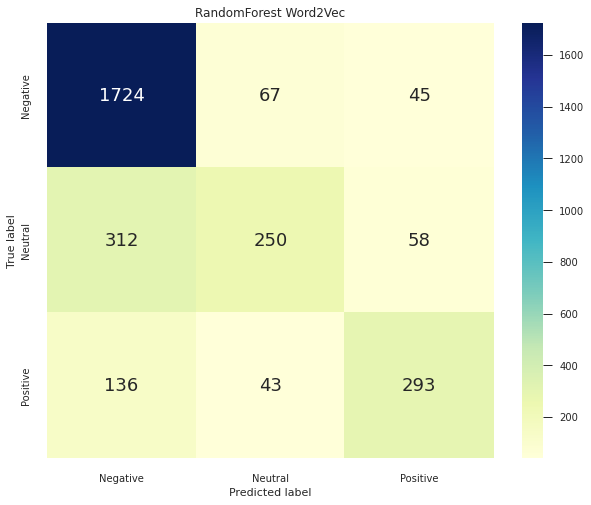

In [ ]:
make_confusion_matrix(rf_w2v_randomCV, 
                      X_test=X_test_w2v,y_test=y_test_w2v,
                      desc="RandomForest Word2Vec",
                      CATEGORIES=["Negative", "Neutral", "Positive"])

In [ ]:
df_scores = pd.concat([df_scores, df_score_rf_w2v],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test","F1-Test"], ascending=False)

Description             Accuracy-Train  Accuracy-Test  Precision-Train  \
2  RandomForest Word2Vec 0.9871          0.7742         0.9872             
0    RandomForest TF-IDF 0.7038          0.6714         0.8008             
1       RandomForest BOW 0.6480          0.6581         0.7388             

   Precision-Test  Recall-Train  Recall-Test  F1-Train  F1-Test  
2 0.7640          0.9871        0.7742       0.9871    0.7563    
0 0.7549          0.7038        0.6714       0.7237    0.6918    
1 0.7443          0.6480        0.6581       0.6688    0.6787

In [ ]:
# The Word2vec used transformed vectorizer, 
# whose features does not map to individual words.
# Hence, feature importance wont tell the important words. 

# 8. LSTM Deep Learning Model

Bi directional LSTM (Recurrent Neural Network)

In [ ]:
df_clean_tweet.sample(20) # check samples

Unnamed: 0  \
11738  11738        
11667  11667        
12777  12777        
6932    6932        
6992    6992        
828      828        
10844  10844        
10786  10786        
3694    3694        
4498    4498        
10347  10347        
11353  11353        
4553    4553        
6789    6789        
9558    9558        
7900    7900        
11678  11678        
2055    2055        
5304    5304        
11844  11844        

      text                                                                                                                                                     \
11738                             @usairways I just want to get home before Wednesday... Joke is over, 50hrs of Cancelled Flightlations and delays is enough!   
11667  @USAirways UR service is so shitty. Pilot never showed up so we waited hours because another pilot was supposed to come but didn't #Cancelled Flighted   
12777                                                                                                  @AmericanAir now I have to wait "more than 60 minutes"   
6932                                                                                    how sway how “@JetBlue: Our fleet's on fleek. http://t.co/tQc96tKcI9”   
6992                                                                                         Lol, k. “@JetBlue: Our fleet's on fleek. http://t.co/IUX94Rgc83”   
828                        @united load balancing system apparently down #systemwide - major impact on all #united airlines flights. Was this a #cyberattack?   
10844                                                                                           @USAirways can I bring mini bottles of booze on to my flight?   
10786                     @USAirways more lies, they said in their email we were delayed due to weather when the sky was clear in the city we were departing.   
3694                                                                @united can't DM, you're not following. LLY144. Rebooked on #UA1516 but still need seats.   
4498                                                                      @SouthwestAir three hour flight to Orlando and no wifi? Uncool. #firstworldproblems   
10347    @USAirways This is garbage, been trying to book a reward flight and then it got Cancelled Flighted and still can't get anyone on phone. Unacceptable   
11353                                                 @USAirways Joined Silver Preferred because I heard customer service was so great, pity I was misguided.   
4553                 @SouthwestAir when I called I was told my bag had made it to PHL, but still has not been delivered or any call from the delivery service   
6789                                                                        @JetBlue wouldn't mind paying for the snacks but no $ for tix :-) Great job guys!   
9558                    @USAirways I need to speak with a live person. I've had it with the recordings. I was told on Sat that we'd have our luggage by yest.   
7900                                                                                                                                @JetBlue 162, SMF to JFK!   
11678                     @USAirways 2 and a half hours on hold... Hope it feels good to be a steaming pile of shit.  @AmericanAir paid far too much for you.   
2055                                                           @united averaging 200 minute wait times tonight or what? I've gotten no help from you tonight.   
5304              @SouthwestAir I'm upset because we were lied to. Was told ice on runway, but EVERY other carrier was able to fly. Airport confirmed no ice!   
11844                                                                                                                              @USAirways No kidding. Oy.   

      airline_sentiment  \
11738  negative           
11667  negative           
12777  negative           
6932    neutral           
6992    neutral           
828    negative      

## 8.1 Data Split into Train, Validation, Test

Data-split is carried early to avoid data-leakage.

Train :: Validation :: Test = 70 :: 15 :: 15

In [ ]:


%%time

# Split dataset into train and test

X_train_lstm, X_test_lstm, \
y_train_lstm, y_test_lstm = train_test_split(
    pd.DataFrame( df_clean_tweet["clean_text"].values.astype('U'), 
                 index=df_clean_tweet.index,
                 ), 
    df_clean_tweet["airline_sentiment"], 
    test_size=0.30, 
    random_state=10,
    stratify=df_clean_tweet["airline_sentiment"])


print("X_train_lstm", X_train_lstm.shape)
print("X_test_lstm", X_test_lstm.shape)
print("y_train_lstm", y_train_lstm.shape)
print("y_test_lstm", y_test_lstm.shape)


X_train_lstm (10248, 1)
X_test_lstm (4392, 1)
y_train_lstm (10248,)
y_test_lstm (4392,)
CPU times: user 30.8 ms, sys: 3 ms, total: 33.8 ms
Wall time: 32.5 ms


In [ ]:
# check if the distribution of target classes are preserved after dataset split

print(df_clean_tweet["airline_sentiment"].value_counts(
                                            normalize=True))
print("="*40)
print(y_train_lstm.value_counts(normalize=True))
print("="*40)
print(y_test_lstm.value_counts(normalize=True))
print("="*40)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6270
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6268
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64


In [ ]:
X_train_lstm.sample(10)

0                                                                                        
8942                                 omg wish i flight today haha always next time have fun lft
1536                                                                             seat god awful
10546            i hold hours easier way cancel flightget refund expressionless_face weary_face
5417   suggestions tell customers approximate wait time hold min now allow cancel flight online
3345                                                    as always be help communicate customers
13134                           my pleasure next aa flight wednesday milan italy see then happy
11183            get rebooked send a wrong gate travel back b correct flight tiredampfrustrated
11915                                                                  get another flight thank
7437                                        exactly flight delay bdl dca cannot seem get answer
8220                                                           hi i try find flight middle east

In [ ]:
y_test_lstm.sample(10)

8753     negative
12590     neutral
3730     positive
9657      neutral
3487      neutral
8683     negative
6986      neutral
8780      neutral
7268     positive
11308    positive
Name: airline_sentiment, dtype: object

In [ ]:
%%time

# Split test dataset into validation and test

X_val_lstm, X_test_lstm, \
y_val_lstm, y_test_lstm = train_test_split(
    X_test_lstm, 
    y_test_lstm, 
    test_size=0.50, 
    random_state=10,
    stratify=y_test_lstm)


print("X_val_lstm", X_val_lstm.shape)
print("X_test_lstm", X_test_lstm.shape)
print("y_val_lstm", y_val_lstm.shape)
print("y_test_lstm", y_test_lstm.shape)

X_val_lstm (2196, 1)
X_test_lstm (2196, 1)
y_val_lstm (2196,)
y_test_lstm (2196,)
CPU times: user 4.25 ms, sys: 1.01 ms, total: 5.26 ms
Wall time: 5.16 ms


In [ ]:
# check if the distribution of target classes are preserved after dataset split

print(df_clean_tweet["airline_sentiment"].value_counts(
                                            normalize=True))
print("="*40)
print(y_train_lstm.value_counts(normalize=True))
print("="*40)
print(y_val_lstm.value_counts(normalize=True))
print("="*40)
print(y_test_lstm.value_counts(normalize=True))
print("="*40)

negative   0.6269
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6270
neutral    0.2117
positive   0.1614
Name: airline_sentiment, dtype: float64
negative   0.6270
neutral    0.2117
positive   0.1612
Name: airline_sentiment, dtype: float64
negative   0.6266
neutral    0.2117
positive   0.1617
Name: airline_sentiment, dtype: float64


In [ ]:
X_val_lstm.sample(10)

0                                                                                     
9791                        rant cont to top off reschedule flight tpa already delay how bad
11669                                                                         fly high thank
1769               do bereavement discount airfare grandfather pass need attend funeral week
12276                     guess i get brag you i fly choice unlike others fly not options js
4668                  i stick fly free southwest go son work wonderful company moms fly free
5133   min get bag check n atx miss flight spend day n not get baggage end all epitimeoffail
765                  people counter helpful as see nobody there flight austin still sit here
8974                                                  move delta direct thank accommodations
6038                                thank agent board atlaus leave wallet inbound he find me
6525                  amaze customer service well will definitely fly guy instrument involve

In [ ]:
y_val_lstm.sample(10)

10460    negative
13642    negative
9603      neutral
8691     negative
4008      neutral
12989    negative
2831     negative
9730      neutral
13428    negative
10990    positive
Name: airline_sentiment, dtype: object

## 8.2 Tokenization - Data Preprocessing

In [ ]:
tokenizer = Tokenizer(num_words = 5000, #vocab_size, input_dim
                      oov_token="<OOV>")

tokenizer.fit_on_texts(X_train_lstm[0])
tokenizer.word_index



{'<OOV>': 1,
 'i': 2,
 'flight': 3,
 'not': 4,
 'get': 5,
 'thank': 6,
 'cancel': 7,
 'service': 8,
 'delay': 9,
 'time': 10,
 'help': 11,
 'you': 12,
 'go': 13,
 'customer': 14,
 'call': 15,
 'fly': 16,
 'us': 17,
 'bag': 18,
 'would': 19,
 'wait': 20,
 'make': 21,
 'hold': 22,
 'hours': 23,
 'need': 24,
 'be': 25,
 'amp': 26,
 'cannot': 27,
 'try': 28,
 'plane': 29,
 'still': 30,
 'one': 31,
 'please': 32,
 'gate': 33,
 'book': 34,
 'seat': 35,
 'say': 36,
 'flightled': 37,
 'take': 38,
 'tell': 39,
 'back': 40,
 'do': 41,
 'change': 42,
 'hour': 43,
 'face': 44,
 'it': 45,
 'phone': 46,
 'check': 47,
 'no': 48,
 'know': 49,
 'late': 50,
 'guy': 51,
 'today': 52,
 'like': 53,
 'work': 54,
 'now': 55,
 'give': 56,
 'airline': 57,
 'miss': 58,
 'ticket': 59,
 'leave': 60,
 'me': 61,
 'way': 62,
 'could': 63,
 'board': 64,
 'airport': 65,
 'want': 66,
 'day': 67,
 'send': 68,
 'travel': 69,
 'hrs': 70,
 'really': 71,
 'sit': 72,
 'great': 73,
 'love': 74,
 'this': 75,
 'never': 76,
 'ha

In [ ]:
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train_lstm[0])

print(train_sequences[10]), len(train_sequences[10])

[6, 1615, 8, 268, 1998, 1187, 103]


(None, 7)

In [ ]:
print(train_sequences[0]), len(train_sequences[0])

[2, 78, 1993, 3979, 741, 762, 2, 872, 2, 466, 2904]


(None, 11)

In [ ]:
print(train_sequences[100]), len(train_sequences[100])

[32, 68, 11, 261, 255, 3, 340, 35, 565, 188]


(None, 10)

Data distrubution of sequence length


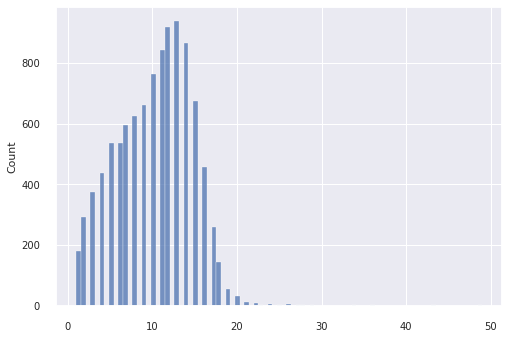

In [ ]:
len_train_seq = [ len(i) for i in train_sequences]

print("Data distrubution of sequence length")

sns.histplot(data =len_train_seq);

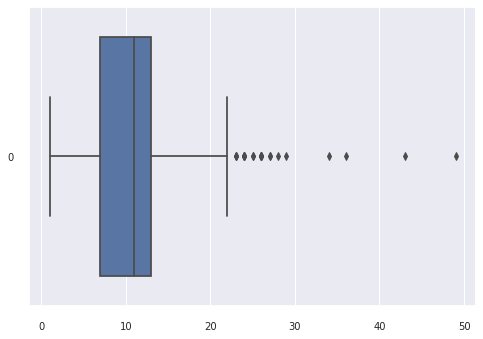

In [ ]:
sns.boxplot(data =len_train_seq, orient="h");

### Observation by Sanjib:

1. Most of the lengths of sequences are under 20. 

In [ ]:
"""
  IMPORTANT NOTE: 
    We observed that tweets generally have the sentiment 
    expressed towards end of tweet, as conclusion. Hence
    words towards end of tweet are important in sentiment
    classification. 
    We'll go for "pre" padding, and "pre" truncating. 
"""

train_padded = pad_sequences(
    train_sequences, 
    maxlen=20,            # maximum length of all sequences. 
    padding="pre", 
    truncating="pre")

In [ ]:
train_padded[10] # length of sequence was 12

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    6, 1615,    8,  268, 1998, 1187,  103], dtype=int32)

In [ ]:
# testing a few more samples of padding, 
# comparing with original length of sequence

[ print(
  "length of train_sequence[{}], train_paddded[{}]= {} ".format(
  i,i,train_padded[i]))  for i in [0,10, 100, 200, 500, 1000, 1500]] 

length of train_sequence[0], train_paddded[0]= [   0    0    0    0    0    0    0    0    0    2   78 1993 3979  741
  762    2  872    2  466 2904] 
length of train_sequence[10], train_paddded[10]= [   0    0    0    0    0    0    0    0    0    0    0    0    0    6
 1615    8  268 1998 1187  103] 
length of train_sequence[100], train_paddded[100]= [  0   0   0   0   0   0   0   0   0   0  32  68  11 261 255   3 340  35
 565 188] 
length of train_sequence[200], train_paddded[200]= [   0    0    0    0    0    0    0    0    0    0   73    3 1287 2018
   29    2  102 4075  162  102] 
length of train_sequence[500], train_paddded[500]= [   0    0    0    0    0    0    0    0    0   71 1491   97  615  242
  215  561  582  283   99  215] 
length of train_sequence[1000], train_paddded[1000]= [   0    0    0    0    0    0    0    0   19  208    2   63  233  108
  531    5  651 1515   26  165] 
length of train_sequence[1500], train_paddded[1500]= [   0    0    0    0    0    0    0    0 

[None, None, None, None, None, None, None]

In [ ]:


# apply same transformation on the 
# validation and test data set

#### Validation Data
val_sequences = tokenizer.texts_to_sequences(X_val_lstm[0])
val_padded = pad_sequences(val_sequences, 
                            maxlen=20, 
                            padding="pre", 
                            truncating="pre")

print("Val Sequence", len(val_sequences))
print("Val Padded", val_padded.shape)

#### Validation Data
test_sequences = tokenizer.texts_to_sequences(X_test_lstm[0])
test_padded = pad_sequences(test_sequences, 
                            maxlen=20, 
                            padding="pre", 
                            truncating="pre")

print("Test Sequence", len(test_sequences))
print("Test Padded", test_padded.shape)

Val Sequence 2196
Val Padded (2196, 20)
Test Sequence 2196
Test Padded (2196, 20)


In [ ]:
# label data encoding starts
y_train_lstm.sample(10)

11210    negative
4793     negative
9822     negative
11223     neutral
7846     negative
7882      neutral
1122     negative
7969      neutral
10284    negative
1007     negative
Name: airline_sentiment, dtype: object

In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(df_clean_tweet["airline_sentiment"])

training_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_train_lstm))

val_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_val_lstm))

test_label_seq = np.array(
    label_tokenizer.texts_to_sequences(y_test_lstm))

label_tokenizer.word_index

{'negative': 1, 'neutral': 2, 'positive': 3}

In [ ]:
# testing a few samples

[ print("training_label_seq[{}]={} ; val_label_seq[{}]={}; testing_label_seq[{}]={}".format(
    i,training_label_seq[i],
    i,val_label_seq[i],
    i,test_label_seq[i])) for i in np.arange(5)]

training_label_seq[0]=[1] ; val_label_seq[0]=[2]; testing_label_seq[0]=[1]
training_label_seq[1]=[1] ; val_label_seq[1]=[1]; testing_label_seq[1]=[1]
training_label_seq[2]=[1] ; val_label_seq[2]=[2]; testing_label_seq[2]=[2]
training_label_seq[3]=[1] ; val_label_seq[3]=[2]; testing_label_seq[3]=[1]
training_label_seq[4]=[1] ; val_label_seq[4]=[1]; testing_label_seq[4]=[1]


[None, None, None, None, None]

In [ ]:
print(training_label_seq.shape, 
      val_label_seq.shape,
      test_label_seq.shape)

(10248, 1) (2196, 1) (2196, 1)


## 8.3 Build Sequential Model

In [ ]:
#Instantiating the Sequential model
model_LSTM = Sequential()                                                                            
#Initializing the embedding layer
model_LSTM.add(Embedding(input_dim=5000,
                    output_dim=64,
                    # 5000, # vocab_size=
                    # 64, embedding_dim=
                    # rnn_units = 64,
                    # BATCH_SIZE=100,
                    input_length=20,
                    # input_dim=10,
                    # output_dim=10               
                    ))  
#Initializing the dropout layer to avoid the overfitting                                               
model_LSTM.add(Dropout(0.5))  
# Initialization of Bi-directional LSTM Layer                                                                       
model_LSTM.add(Bidirectional(LSTM(64)))  # rnn_units
# softmax converts a vector of values to a probability distribution.                                                 
model_LSTM.add(Dense(4, activation='softmax'))                                                     

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 64)            320000    
                                                                 
 dropout (Dropout)           (None, 20, 64)            0         
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 4)                 516       
                                                                 
Total params: 386,564
Trainable params: 386,564
Non-trainable params: 0
_________________________________________________________________


**Embedding Layer**
- Word embeddings allow the value of the vector’s element to be trained. After training, words with similar meanings often have similar vectors.

**Dropout Layer**
- Adding the dropout layer to combat overfitting.

**Bidirectional LSTM Layer**
- The Bidirectional layer propagates the input forward and backwards through the LSTM layer and then concatenates the output. This helps the LSTM to learn long range dependencies.

**Dense Layer**
- This the final layer, the Dense layer with softmax activation for the multi-class classification.

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002,
                              beta_1=0.09,
                              beta_2=0.999,
                              epsilon=1e-07,
                              amsgrad=False,            
                              decay=1e-6)

#crossentropy loss function when there are two or more label classes.

model_LSTM.compile(
    # loss='categorical_crossentropy',  
    loss='sparse_categorical_crossentropy',      
    optimizer=opt,
    metrics=['accuracy'],
)

In [ ]:
%%time

# Model hyper parameter tunning 
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01,
                   mode='max', verbose=1, patience=20,
                   restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', 
                     mode='max', verbose=1, save_best_only=True)


history = model_LSTM.fit(train_padded, 
              training_label_seq, 
              epochs=100, 
              validation_data=(val_padded, val_label_seq), 
              verbose=2,
              batch_size=36,
              callbacks=[es, mc],
              use_multiprocessing=True) 

Epoch 1/100

Epoch 00001: val_accuracy improved from -inf to 0.62705, saving model to best_model.h5
285/285 - 8s - loss: 1.3356 - accuracy: 0.5419 - val_loss: 1.2570 - val_accuracy: 0.6270 - 8s/epoch - 27ms/step
Epoch 2/100

Epoch 00002: val_accuracy did not improve from 0.62705
285/285 - 1s - loss: 1.1075 - accuracy: 0.6270 - val_loss: 1.0028 - val_accuracy: 0.6270 - 1s/epoch - 5ms/step
Epoch 3/100

Epoch 00003: val_accuracy did not improve from 0.62705
285/285 - 1s - loss: 0.9550 - accuracy: 0.6270 - val_loss: 0.9241 - val_accuracy: 0.6270 - 1s/epoch - 5ms/step
Epoch 4/100

Epoch 00004: val_accuracy did not improve from 0.62705
285/285 - 1s - loss: 0.9077 - accuracy: 0.6270 - val_loss: 0.8933 - val_accuracy: 0.6270 - 1s/epoch - 5ms/step
Epoch 5/100

Epoch 00005: val_accuracy did not improve from 0.62705
285/285 - 1s - loss: 0.8763 - accuracy: 0.6270 - val_loss: 0.8560 - val_accuracy: 0.6270 - 1s/epoch - 5ms/step
Epoch 6/100

Epoch 00006: val_accuracy did not improve from 0.62705
285/

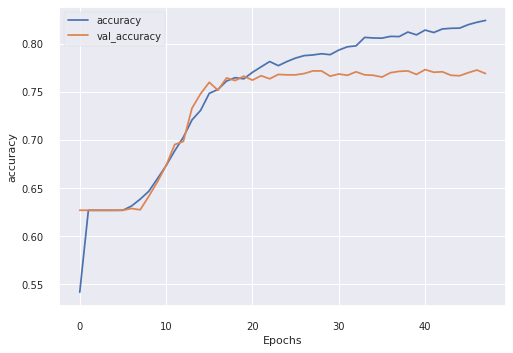

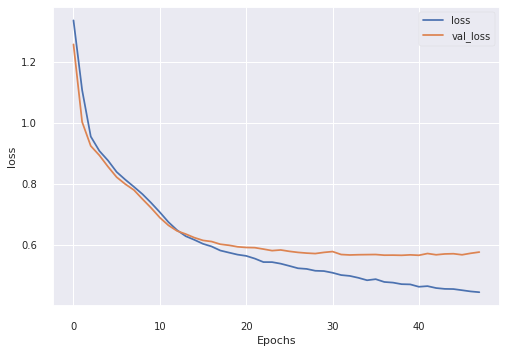

CPU times: user 429 ms, sys: 6.89 ms, total: 436 ms
Wall time: 432 ms


In [ ]:

%%time
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## 8.4 Performance of LSTM Model

In [ ]:
# The shape of above two graphs are decent 

# Test data set is unseen for model LSTM
score = model_LSTM.evaluate(test_padded, test_label_seq)

69/69 [==============================] - 1s 3ms/step - loss: 0.5715 - accuracy: 0.7750


In [ ]:
print(score, score[1]) 

[0.5715365409851074, 0.7750455141067505] 0.7750455141067505


In [ ]:
# training accuracy
accuracy_train = history.history.get("accuracy")[-1]
accuracy_train


0.824355959892273

In [ ]:
# validation accuracy
accuracy_val = history.history.get("val_accuracy")[-1]
accuracy_val

0.7691256999969482

In [ ]:
%%time 

# re usable funtion to measure various performance KPI

def make_confusion_matrix_LSTM(model, 
            test_padded, test_label_seq, y_test,
            history, desc="", CATEGORIES=[]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float = accuracy in training dataset
        acc_val : float = accuracy in validation dataset
        CATEGORIES : list of class names
        desc : str = description of model  
    Returns:
        Dataframe containing accuracy, precision, recall values
  """

  
  # print(CATEGORIES)

  # y_test_pred_ln = model.predict(X_test)
  # y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)

  # training accuracy
  accuracy_train = history.history.get("accuracy")[-1]
  accuracy_train
  print("ACCURACY TRAIN =", accuracy_train) 

  # validation accuracy
  accuracy_val = history.history.get("val_accuracy")[-1]
  accuracy_val
  print("ACCURACY VALIDATION =", accuracy_val) 

  # Test accuracy
  score = model.evaluate(test_padded, test_label_seq)
  accuracy_test = score[1]
  print("ACCURACY TEST =", accuracy_val) 

  # accuracy_test =  accuracy_score(   np.argmax(y_test, axis=1), 
  #     y_test_pred_classes_ln) 
  # print("ACCURACY TEST =", accuracy_test) 


  y_test_pred = model.predict(test_padded)

  # Encode classes into numbers
  y_test_int = y_test.replace({"negative": 1, 
                "neutral": 2, 
                "positive": 3}).astype("uint8")  

  # Test recall
  recall_test =  recall_score(   
      y_test_int,
      np.argmax(y_test_pred, axis=1), 
      average="weighted") 
  print("RECALL TEST =", recall_test) 

  # *********************************************************
  # NOTE : Because Average is chosen as "weighted", 
  # Accuracy-Test == Recall-Test
  # *********************************************************

  # Test precision
  precision_test =  precision_score( 
      y_test_int,  
      np.argmax(y_test_pred, axis=1), 
      average="weighted") 
  print("PRECISION TEST =", precision_test) 

  # Test F1-Score
  f1_test = f1_score(     
      y_test_int,
      np.argmax(y_test_pred, axis=1), 
      average='weighted')
  print("F1 TEST =", f1_test) 


  # Confusion Matrix, multi-class
  cf_matrix = confusion_matrix(
              # np.argmax(y_test, axis=1), 
              y_test_int,
              np.argmax(y_test_pred,axis=1)
            )

  # Confusion matrix normalized per category true value
  # cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)


  plt.figure(figsize=(10,8))
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix, 
              xticklabels=CATEGORIES, 
              yticklabels=CATEGORIES, 
              cmap="YlGnBu", fmt="",
              annot=True)
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  # sns.set_context("notebook")  # talk : bolds the plots

  desc = desc + " Accuracy-Val={:,.4f}".format(accuracy_val)

  return pd.DataFrame( {"Description": desc, 
                        "Accuracy-Train": accuracy_train,
                        # "Accuracy-Validation": accuracy_val,
                        "Accuracy-Test": accuracy_test,
                        "Precision-Train": np.nan,
                        "Precision-Test" : precision_test,
                        "Recall-Train": np.nan,
                        "Recall-Test": recall_test,
                        "F1-Train": np.nan,
                        "F1-Test": f1_test,
                        },
                      index=[0] )



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


ACCURACY TRAIN = 0.824355959892273
ACCURACY VALIDATION = 0.7691256999969482
69/69 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7750
ACCURACY TEST = 0.7691256999969482
RECALL TEST = 0.7750455373406193
PRECISION TEST = 0.764859689555279
F1 TEST = 0.7683907235173932


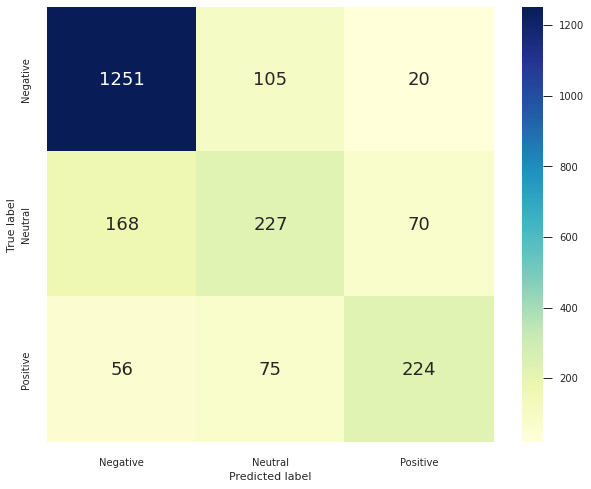

In [ ]:
# save the results in a dataframe
df_score_lstm = make_confusion_matrix_LSTM(
                    model=model_LSTM, 
                    test_padded=test_padded, 
                    test_label_seq=test_label_seq, 
                    y_test=y_test_lstm, 
                    history=history,
                    desc="Bi-LSTM", 
                    CATEGORIES=["Negative", "Neutral", "Positive"]) 

In [ ]:
df_score_lstm

Description                   Accuracy-Train  Accuracy-Test  \
0  Bi-LSTM Accuracy-Val=0.7691 0.8244          0.7750           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
0 nan              0.7649          nan           0.7750       nan         

   F1-Test  
0 0.7684

In [ ]:
df_scores = pd.concat([df_scores, df_score_lstm],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test"], ascending=False)

Description                   Accuracy-Train  Accuracy-Test  \
3  Bi-LSTM Accuracy-Val=0.7691 0.8244          0.7750           
2        RandomForest Word2Vec 0.9871          0.7742           
0          RandomForest TF-IDF 0.7038          0.6714           
1             RandomForest BOW 0.6480          0.6581           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
3    nan           0.7649             nan        0.7750          nan      
2 0.9872           0.7640          0.9871        0.7742       0.9871      
0 0.8008           0.7549          0.7038        0.6714       0.7237      
1 0.7388           0.7443          0.6480        0.6581       0.6688      

   F1-Test  
3 0.7684    
2 0.7563    
0 0.6918    
1 0.6787

In [ ]:
%%time

model_LSTM.save(("/content/drive/MyDrive/Colab Notebooks/UT-Austin/model_LSTM.pkl"))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/UT-Austin/model_LSTM.pkl/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/UT-Austin/model_LSTM.pkl/assets


CPU times: user 10.2 s, sys: 386 ms, total: 10.6 s
Wall time: 11.7 s


# 9. Pre trained BERT model

In [ ]:
import pyarrow as pa
import pyarrow.dataset as ds

from datasets import load_dataset, Dataset

In [ ]:

# Pretrained model

from transformers import TFAutoModelForSequenceClassification

# model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=2)

## 9.1 Feature engineer for BERT model


In [ ]:

X_train_lstm

0                                                                                                      
977                       i use commit continentalairlines flyer merger i remember i switch communicationfail
11083                                                        min hang up always awful call reservations there
7804   quick why person travel w mosaic not get green tag not make sense i end waitin sons bag anyway disgust
3913                                                          y not reply customer refund form unitedairlines
13303                     thank responsetough night involve our flight get cancel flightled start taxi runway
...                                                                                                       ...
3514                    she could not access seat map say would note upgrade itinerary call back late flightr
9552                                                             flight plan delay tuesday due computer crash
14124                                                                  flight still sit dfw wait baggage load
13088                                                                                               get outta
5361                       on hold wait make special accommodations mom travel hour minutes hold unacceptable

[10248 rows x 1 columns]

In [ ]:
X_train_lstm[0]

977                         i use commit continentalairlines flyer merger i remember i switch communicationfail
11083                                                          min hang up always awful call reservations there
7804     quick why person travel w mosaic not get green tag not make sense i end waitin sons bag anyway disgust
3913                                                            y not reply customer refund form unitedairlines
13303                       thank responsetough night involve our flight get cancel flightled start taxi runway
                                                          ...                                                  
3514                      she could not access seat map say would note upgrade itinerary call back late flightr
9552                                                               flight plan delay tuesday due computer crash
14124                                                                    flight still sit dfw wait bagga

In [ ]:

X_train_list = list(X_train_lstm[0]) 
X_train_list

['i use commit continentalairlines flyer merger i remember i switch communicationfail',
 'min hang up always awful call reservations there',
 'quick why person travel w mosaic not get green tag not make sense i end waitin sons bag anyway disgust',
 'y not reply customer refund form unitedairlines',
 'thank responsetough night involve our flight get cancel flightled start taxi runway',
 'so offer flight cancel flight i strand away home work',
 'disappoint faa regulation furnish proof age toddler thx unnecessary headache flyunited',
 'worst i pay not take first flight round trip otherwise cancel flight whole flight',
 'beware barklays bank terrible cust service will not assist know go badly write bookin english',
 'jack cousins trip portland cancel flightled return trip no unite',
 'thank epic service always pleasure outstanding crew',
 'make safe sound thank safe travel',
 'terrible land',
 'i not sure next time',
 'i cri',
 'you jump gun cancel flight flight could make snow now cancel 

In [ ]:

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")


Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

In [ ]:

def tokenize_function(examples):
    return tokenizer(examples,  
                      padding="max_length", 
                      truncation=True)

# pa_table_test = pa.table(tokenize_function(
#     ["min hang up always awful call reservations there", 
#      "a test string"]))
# pa_table_test
# # tokenized_datasets = raw_datasets.map(tokenize_function, batched=True)

In [ ]:
# pa_table_test.to_pandas()

#unit test
tokenize_function(
    ["min hang up always awful call reservations there", 
     "a test string"])

{'input_ids': [[101, 11241, 7311, 1146, 1579, 9684, 1840, 20624, 1175, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
%%time
dataset_train = Dataset.from_dict(
    tokenize_function( X_train_list ) )

CPU times: user 1.82 s, sys: 559 ms, total: 2.38 s
Wall time: 1.78 s


In [ ]:
dataset_train

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 10248
})

In [ ]:
print(dataset_train[10]) # checking

{'input_ids': [101, 6243, 11431, 1555, 1579, 4687, 6976, 3039, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
%%time 

dataset_val = Dataset.from_dict(
    tokenize_function( list(X_val_lstm[0]) ) )

CPU times: user 395 ms, sys: 18.9 ms, total: 414 ms
Wall time: 301 ms


In [ ]:
print(dataset_val)

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2196
})


In [ ]:
%%time 

dataset_test = Dataset.from_dict(
    tokenize_function( list(X_test_lstm[0]) ) )

CPU times: user 403 ms, sys: 17.1 ms, total: 420 ms
Wall time: 310 ms


In [ ]:
dataset_test


Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 2196
})

In [ ]:
y_train_lstm

977      negative
11083    negative
7804     negative
3913     negative
13303    negative
           ...   
3514     negative
9552     negative
14124    negative
13088    negative
5361     negative
Name: airline_sentiment, Length: 10248, dtype: object

In [ ]:
y_train_bert = \
tf.keras.utils.to_categorical(
                    
                    y_train_lstm.replace(
                              {"negative": 0, 
                              "neutral": 1, 
                              "positive": 2}
                          ).astype("uint8"),
                    num_classes=3)

In [ ]:
y_train_bert

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
# dataset_train_array = [ dataset_train[f] for f in dataset_train.features ]
# dataset_train_array

[k  for k in dataset_train.features] 

['input_ids', 'token_type_ids', 'attention_mask']

In [ ]:
# print(dataset_train_array)

In [ ]:
# np.array(dataset_train['input_ids'])

In [ ]:
# tr_reviews, tr_segments, tr_masks = np.split(
#     np.array(dataset_train.to_pandas()), 3, axis=1)


In [ ]:
# val_reviews, val_segments, val_masks = np.split(
#     np.array(dataset_val.to_pandas()), 3, axis=1)
# test_reviews, test_segments, test_masks = np.split(
#     np.array(dataset_test.to_pandas()), 3, axis=1)

In [ ]:
# tr_reviews = tr_reviews.squeeze()
# tr_segments = tr_segments.squeeze()
# tr_masks = tr_masks.squeeze()

# val_reviews = val_reviews.squeeze()
# val_segments = val_segments.squeeze()
# val_masks = val_masks.squeeze()

In [ ]:
# def example_to_features(input_ids,attention_masks,token_type_ids,y):
#   return {"input_ids": input_ids,
#           "attention_mask": attention_masks,
#           "token_type_ids": token_type_ids},y


# train_ds = tf.data.Dataset.from_tensor_slices((tr_reviews, tr_masks, 
#                                                tr_segments, y_train_bert)).\
#             map(example_to_features).shuffle(100).batch(16)

# valid_ds = tf.data.Dataset.from_tensor_slices((val_reviews, val_masks, 
#                                                val_segments, y_val)).\
#             map(example_to_features).shuffle(100).batch(16)

In [ ]:
# Encode classes into numbers
y_train_bert = y_train_lstm.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y_train_bert

977      0
11083    0
7804     0
3913     0
13303    0
        ..
3514     0
9552     0
14124    0
13088    0
5361     0
Name: airline_sentiment, Length: 10248, dtype: uint8

In [ ]:
y_val_bert = y_val_lstm.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y_val_bert

6213     1
2639     0
8330     1
13682    1
10773    0
        ..
5617     2
6706     0
8544     1
12044    0
8300     1
Name: airline_sentiment, Length: 2196, dtype: uint8

In [ ]:
y_test_bert = y_test_lstm.replace({"negative": 0, 
               "neutral": 1, 
               "positive": 2}).astype("uint8")
y_test_bert

7552     0
3240     0
5444     1
10123    0
11246    0
        ..
12971    0
7181     2
905      0
6721     1
8665     2
Name: airline_sentiment, Length: 2196, dtype: uint8

In [ ]:
dataset_train = dataset_train.add_column( name="label",
                          column=y_train_bert ,)
dataset_train

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
    num_rows: 10248
})

In [ ]:
dataset_train["label"]


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 1,


In [ ]:
dataset_val = dataset_val.add_column( name="label",
                          column=y_val_lstm.replace(
                              {"negative": 0, 
                              "neutral": 1, 
                              "positive": 2}
                          ))
dataset_val

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
    num_rows: 2196
})

In [ ]:
dataset_test = dataset_test.add_column( name="label",
                          column=y_test_lstm.replace(
                              {"negative": 0, 
                              "neutral": 1, 
                              "positive": 2}
                          ))
dataset_test

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask', 'label'],
    num_rows: 2196
})

In [ ]:
type(dataset_train['input_ids'])

list

In [ ]:
%%time

train_features = {x: dataset_train[x] for x in dataset_train.features}
train_tf_dataset = tf.data.Dataset.from_tensor_slices((train_features, 
                                                y_train_bert))


train_tf_dataset = train_tf_dataset.shuffle(
    y_train_bert.shape[0]).batch(8)


CPU times: user 38.5 s, sys: 65.9 ms, total: 38.6 s
Wall time: 38.5 s


In [ ]:
%%time
eval_features = {x: dataset_val[x] for x in dataset_val.features}
eval_tf_dataset = tf.data.Dataset.from_tensor_slices((eval_features, 
                                                      y_val_bert))
eval_tf_dataset = eval_tf_dataset.batch(8)

CPU times: user 8.22 s, sys: 7.46 ms, total: 8.23 s
Wall time: 8.21 s


In [ ]:
%%time
test_features = {x: dataset_test[x] for x in dataset_test.features}
test_tf_dataset = tf.data.Dataset.from_tensor_slices((test_features, 
                                                      y_test_bert))
test_tf_dataset = test_tf_dataset.batch(8)

CPU times: user 8.31 s, sys: 10.8 ms, total: 8.32 s
Wall time: 8.31 s


## 9.2 Build BERT model


In [ ]:
bert_name="bert-base-cased"

# Warnings can be ignored safely
bert_model = TFAutoModelForSequenceClassification.from_pretrained(bert_name, 
                                                     num_labels=3)

Downloading:   0%|          | 0.00/502M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
%%time

bert_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5,
                              beta_1=0.09,
                              beta_2=0.999,
                              epsilon=1e-07,
                              amsgrad=False,            
                              decay=1e-6),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy(),
)



CPU times: user 10.4 ms, sys: 8 µs, total: 10.4 ms
Wall time: 9.61 ms


In [ ]:

bert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
 dropout_38 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  2307      
                                                                 
Total params: 108,312,579
Trainable params: 108,312,579
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time

history_bert = bert_model.fit(train_tf_dataset, 
                              validation_data=eval_tf_dataset, 
                              epochs=2,
                              # verbose=2,
                              batch_size=36,
                              use_multiprocessing=True)

Epoch 1/2
1281/1281 - 788s - loss: 0.5782 - sparse_categorical_accuracy: 0.7633 - val_loss: 0.5335 - val_sparse_categorical_accuracy: 0.7978 - 788s/epoch - 615ms/step
Epoch 2/2
1281/1281 - 767s - loss: 0.3979 - sparse_categorical_accuracy: 0.8502 - val_loss: 0.5150 - val_sparse_categorical_accuracy: 0.7964 - 767s/epoch - 599ms/step
CPU times: user 16min 41s, sys: 2min 17s, total: 18min 59s
Wall time: 25min 55s


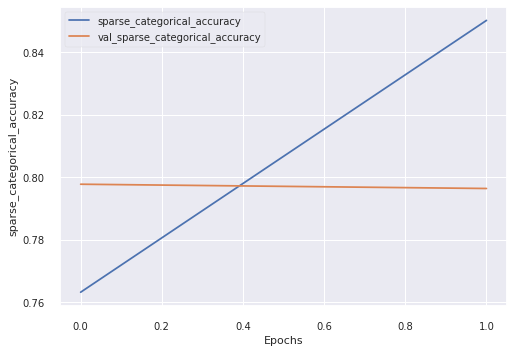

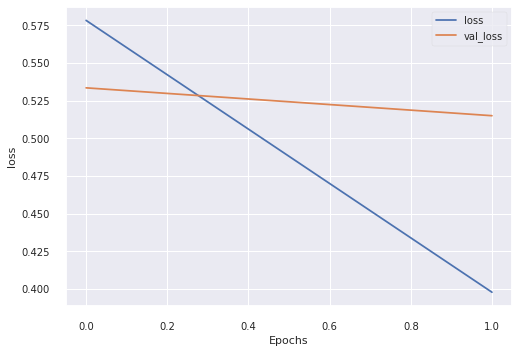

CPU times: user 487 ms, sys: 6.03 ms, total: 493 ms
Wall time: 485 ms


In [ ]:
%%time
# def plot_graphs(history, string):
#   plt.plot(history.history[string])
#   plt.plot(history.history['val_'+string])
#   plt.xlabel("Epochs")
#   plt.ylabel(string)
#   plt.legend([string, 'val_'+string])
#   plt.show()
  
plot_graphs(history_bert, "sparse_categorical_accuracy")
plot_graphs(history_bert, "loss")

In [ ]:
bert_model.save_pretrained("/content/drive/MyDrive/Colab Notebooks/UT-Austin/model_BERT.pkl")

In [ ]:
history_bert.history


{'loss': [0.5781828165054321, 0.3979165554046631],
 'sparse_categorical_accuracy': [0.7632708549499512, 0.8502146601676941],
 'val_loss': [0.5334548950195312, 0.5149792432785034],
 'val_sparse_categorical_accuracy': [0.7978141903877258, 0.7964481115341187]}

## 9.3 Performance of BERT model


In [ ]:
# training accuracy
accuracy_train = history_bert.history.get("sparse_categorical_accuracy")[-1]
accuracy_train

0.8502146601676941

In [ ]:
# validation accuracy
accuracy_val = history_bert.history.get("val_sparse_categorical_accuracy")[-1]
accuracy_val

0.7964481115341187

In [ ]:
print(range(y_test_bert.shape[0]), y_test_bert.shape)

range(0, 2196) (2196,)


In [ ]:
%%time 

# re usable funtion to measure various performance KPI

def make_confusion_matrix_BERT(model, 
            test_tf_dataset, y_test_bert,
            history, desc="", CATEGORIES=[]):
  """
    Description:
        Prints the confusion matrix formatted.
    Parameters:
        model : Sequential = classifier to predict values of X
        X_test: np.array = test set
        y_test : np.array = ground truth
        acc_train : float = accuracy in training dataset
        acc_val : float = accuracy in validation dataset
        CATEGORIES : list of class names
        desc : str = description of model  
    Returns:
        Dataframe containing accuracy, precision, recall values
  """

  
  # print(CATEGORIES)

  # y_test_pred_ln = model.predict(X_test)
  # y_test_pred_classes_ln = np.argmax(y_test_pred_ln, axis=1)

  # training accuracy
  accuracy_train = history.history.get(
      "sparse_categorical_accuracy")[-1]
  accuracy_train
  print("ACCURACY TRAIN =", accuracy_train) 

  # validation accuracy
  accuracy_val = history.history.get(
      "val_sparse_categorical_accuracy")[-1]
  accuracy_val
  print("ACCURACY VALIDATION =", accuracy_val) 



  # accuracy_test =  accuracy_score(   np.argmax(y_test, axis=1), 
  #     y_test_pred_classes_ln) 
  # print("ACCURACY TEST =", accuracy_test) 


  y_test_pred = model.predict(
      test_tf_dataset)
  print("y test predicted =",y_test_pred)
  y_test_pred = np.argmax( y_test_pred.logits, 
                          axis=1 ) 
  print("y test predicted =",y_test_pred)
  

  # Test accuracy
  # score = model.evaluate(test_tf_dataset)
  accuracy_test = accuracy_score(
                    y_test_bert,
                    y_test_pred
                   )
  print("ACCURACY TEST =", accuracy_test) 

  # Encode classes into numbers
  # y_test_int = y_test.replace({"negative": 1, 
  #               "neutral": 2, 
  #               "positive": 3}).astype("uint8")  

  # Test recall
  recall_test =  recall_score(   
      y_test_bert,
      y_test_pred, 
      average="weighted") 
  print("RECALL TEST =", recall_test) 

  # *********************************************************
  # NOTE : Because Average is chosen as "weighted", 
  # Accuracy-Test == Recall-Test
  # *********************************************************

  # Test precision
  precision_test =  precision_score( 
      y_test_bert,  
      y_test_pred, 
      average="weighted") 
  print("PRECISION TEST =", precision_test) 

  # Test F1-Score
  f1_test = f1_score(     
      y_test_bert,
      y_test_pred, 
      average='weighted')
  print("F1 TEST =", f1_test) 


  # Confusion Matrix, multi-class
  cf_matrix = confusion_matrix(
              # np.argmax(y_test, axis=1), 
              y_test_bert,
              y_test_pred
            )

  # Confusion matrix normalized per category true value
  # cf_matrix_n1 = cf_matrix/np.sum(cf_matrix, axis=1)


  plt.figure(figsize=(10,8))
  # sns.set_context("talk")  # talk : bolds the plots
  sns.heatmap(cf_matrix, 
              xticklabels=CATEGORIES, 
              yticklabels=CATEGORIES, 
              cmap="YlGnBu", fmt="",
              annot=True)
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  # sns.set_context("notebook")  # talk : bolds the plots

  desc = desc + " Accuracy-Val={:,.4f}".format(accuracy_val)

  return pd.DataFrame( {"Description": desc, 
                        "Accuracy-Train": accuracy_train,
                        # "Accuracy-Validation": accuracy_val,
                        "Accuracy-Test": accuracy_test,
                        "Precision-Train": np.nan,
                        "Precision-Test" : precision_test,
                        "Recall-Train": np.nan,
                        "Recall-Test": recall_test,
                        "F1-Train": np.nan,
                        "F1-Test": f1_test,
                        },
                      index=[0] )



CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


ACCURACY TRAIN = 0.8502146601676941
ACCURACY VALIDATION = 0.7964481115341187
y test predicted = TFSequenceClassifierOutput(loss=None, logits=array([[ 0.01638304,  0.00367652, -0.01592243],
       [ 1.9554384 , -0.2277751 , -1.3836623 ],
       [-2.377065  , -0.05725345,  2.2468925 ],
       ...,
       [ 3.4056613 , -0.8101047 , -2.4198413 ],
       [-1.5906706 ,  1.7949401 , -0.12629718],
       [-1.2966954 , -1.4814432 ,  2.5985134 ]], dtype=float32), hidden_states=None, attentions=None)
y test predicted = [0 0 2 ... 0 1 2]
ACCURACY TEST = 0.8051001821493625
RECALL TEST = 0.8051001821493625
PRECISION TEST = 0.8122008800070484
F1 TEST = 0.805867096841709
CPU times: user 15.7 s, sys: 2.44 s, total: 18.2 s
Wall time: 51.7 s


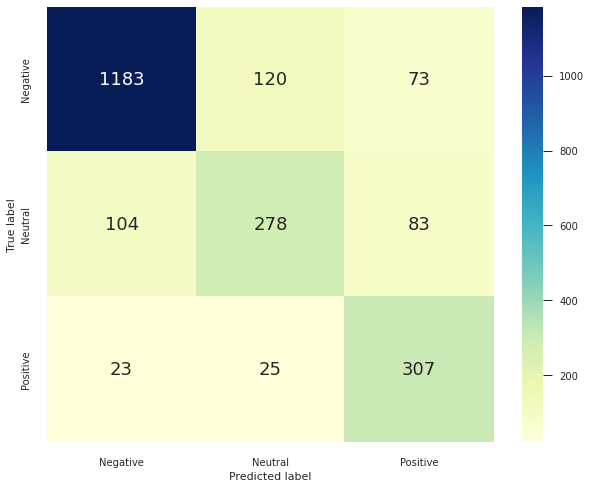

In [231]:
%%time

# test data is unseen

# save the results in a dataframe
df_score_bert = make_confusion_matrix_BERT(
                    model=bert_model, 
                    test_tf_dataset=test_tf_dataset, 
                    y_test_bert=y_test_bert, 
                    history=history_bert,
                    desc="BERT Pre-trained", 
                    CATEGORIES=["Negative", "Neutral", "Positive"]) 

In [232]:
df_score_bert

Description                            Accuracy-Train  Accuracy-Test  \
0  BERT Pre-trained Accuracy-Val=0.7964 0.8502          0.8051           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
0 nan              0.8122          nan           0.8051       nan         

   F1-Test  
0 0.8059

In [233]:
df_scores = pd.concat([df_scores, df_score_bert],
                      axis=0,
                      ignore_index=True)
df_scores.sort_values(by=["Accuracy-Test"], ascending=False)

Description                            Accuracy-Train  Accuracy-Test  \
4  BERT Pre-trained Accuracy-Val=0.7964 0.8502          0.8051           
5  BERT Pre-trained Accuracy-Val=0.7964 0.8502          0.8051           
3           Bi-LSTM Accuracy-Val=0.7691 0.8244          0.7750           
2                 RandomForest Word2Vec 0.9871          0.7742           
0                   RandomForest TF-IDF 0.7038          0.6714           
1                      RandomForest BOW 0.6480          0.6581           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
4    nan           0.8122             nan        0.8051          nan      
5    nan           0.8122             nan        0.8051          nan      
3    nan           0.7649             nan        0.7750          nan      
2 0.9872           0.7640          0.9871        0.7742       0.9871      
0 0.8008           0.7549          0.7038        0.6714       0.7237      
1 0.7388           0.7443          0.6480        0.6581       0.6688      

   F1-Test  
4 0.8059    
5 0.8059    
3 0.7684    
2 0.7563    
0 0.6918    
1 0.6787

# 10. Model Selection

In [234]:
df_scores_sorted = \
                  df_scores.sort_values(
                      by=["Accuracy-Test"],
                      ascending=False,
                      ignore_index=True,
                      inplace=False,
                  )


In [235]:
df_scores_sorted

Description                            Accuracy-Train  Accuracy-Test  \
0  BERT Pre-trained Accuracy-Val=0.7964 0.8502          0.8051           
1  BERT Pre-trained Accuracy-Val=0.7964 0.8502          0.8051           
2           Bi-LSTM Accuracy-Val=0.7691 0.8244          0.7750           
3                 RandomForest Word2Vec 0.9871          0.7742           
4                   RandomForest TF-IDF 0.7038          0.6714           
5                      RandomForest BOW 0.6480          0.6581           

   Precision-Train  Precision-Test  Recall-Train  Recall-Test  F1-Train  \
0    nan           0.8122             nan        0.8051          nan      
1    nan           0.8122             nan        0.8051          nan      
2    nan           0.7649             nan        0.7750          nan      
3 0.9872           0.7640          0.9871        0.7742       0.9871      
4 0.8008           0.7549          0.7038        0.6714       0.7237      
5 0.7388           0.7443          0.6480        0.6581       0.6688      

   F1-Test  
0 0.8059    
1 0.8059    
2 0.7684    
3 0.7563    
4 0.6918    
5 0.6787

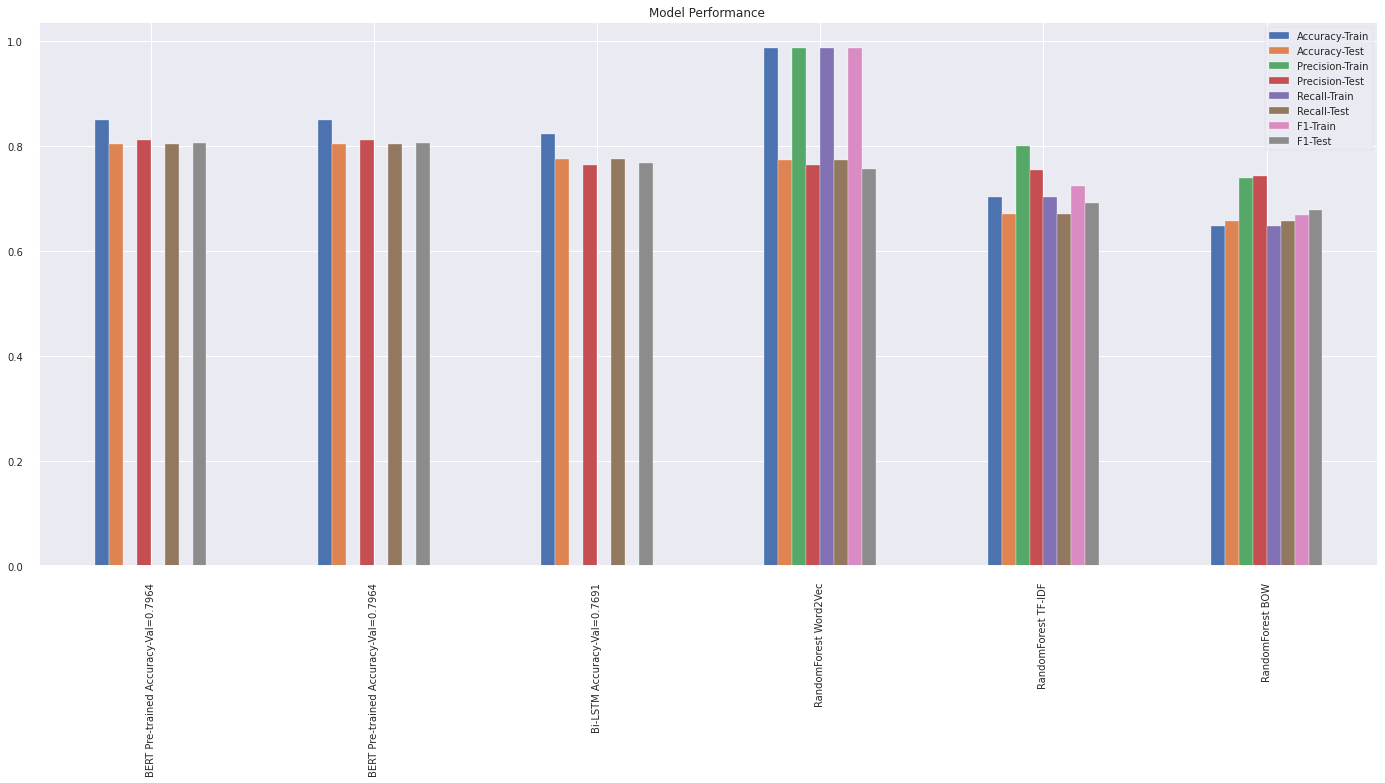

In [236]:
# plot models's performance
fig, axs = plt.subplots(figsize=(24, 10))
df_scores_sorted.plot(kind="bar", ax=axs, legend=True)
plt.title("Model Performance ")
plt.xticks(ticks=df_scores.index, labels=df_scores_sorted["Description"])
fig.show()

In [237]:
# in the plot above the top performing model, first one,
#  is also balanced w.r.t. overfitting
df_scores_sorted.loc[0,"Description"] # the best performed model

'BERT Pre-trained Accuracy-Val=0.7964'

# 11. Key Takeaways - Insights



# 12. Appendix

*Next Steps :*

1. In order to productionize the code, the Notebook needs to saved as *.py file (Python).
2. Also, the code needs to be organized in functions and classes (Object Oriented Programming) for re-use. The code of Data Processing can be combined into generic function to apply in number of use cases, e.g. method of class 'EDA' (Exploratory Data Analysis), also useful during model prediction in production.
3. We need to introduce exception handling in the code, try-catch-finally, and logging.
4. We need to save processed data, results, graphs etc. into persistance store (e.g. disk).

Assumption: Productionization of Code is not in the scope of this assignment, even though I am capable of implementing it.

_____________________________________________________________________________________________________
Thank you for your reading of this Notebook. Please share your suggestions, comments to <sanjib007@gmail.com>

_______________________________________________________________________________________________________________

#  --   The End --